In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pylab
sns.set(style='white')
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
nifty50=pd.read_csv('./data/NIFTY_50__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")
nifty100=pd.read_csv('./data/NIFTY_100__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")
nifty500=pd.read_csv('./data/NIFTY_500__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")
niftyauto=pd.read_csv('./data/NIFTY_AUTO__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")
niftybank=pd.read_csv('./data/NIFTY_BANK__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")
niftycommod=pd.read_csv('./data/NIFTY_COMMODITIES__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")
niftyenergy=pd.read_csv('./data/NIFTY_ENERGY__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")
niftyfin=pd.read_csv('./data/NIFTY_FIN_SERVICE__EQ__INDICES__NSE__MINUTE.csv',parse_dates =["timestamp"], index_col ="timestamp")


In [ ]:
# df['Date']=pd.to_datetime(df['Date'])
# df.set_index(['Date'],inplace=True)


In [ ]:
# This function returns a dataframe of the missng information.
# Number of columns with missing info and percentage of missing info is printed

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# nifty50 data does not have any missing data

missing_table=missing_values_table(nifty50)
missing_table

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

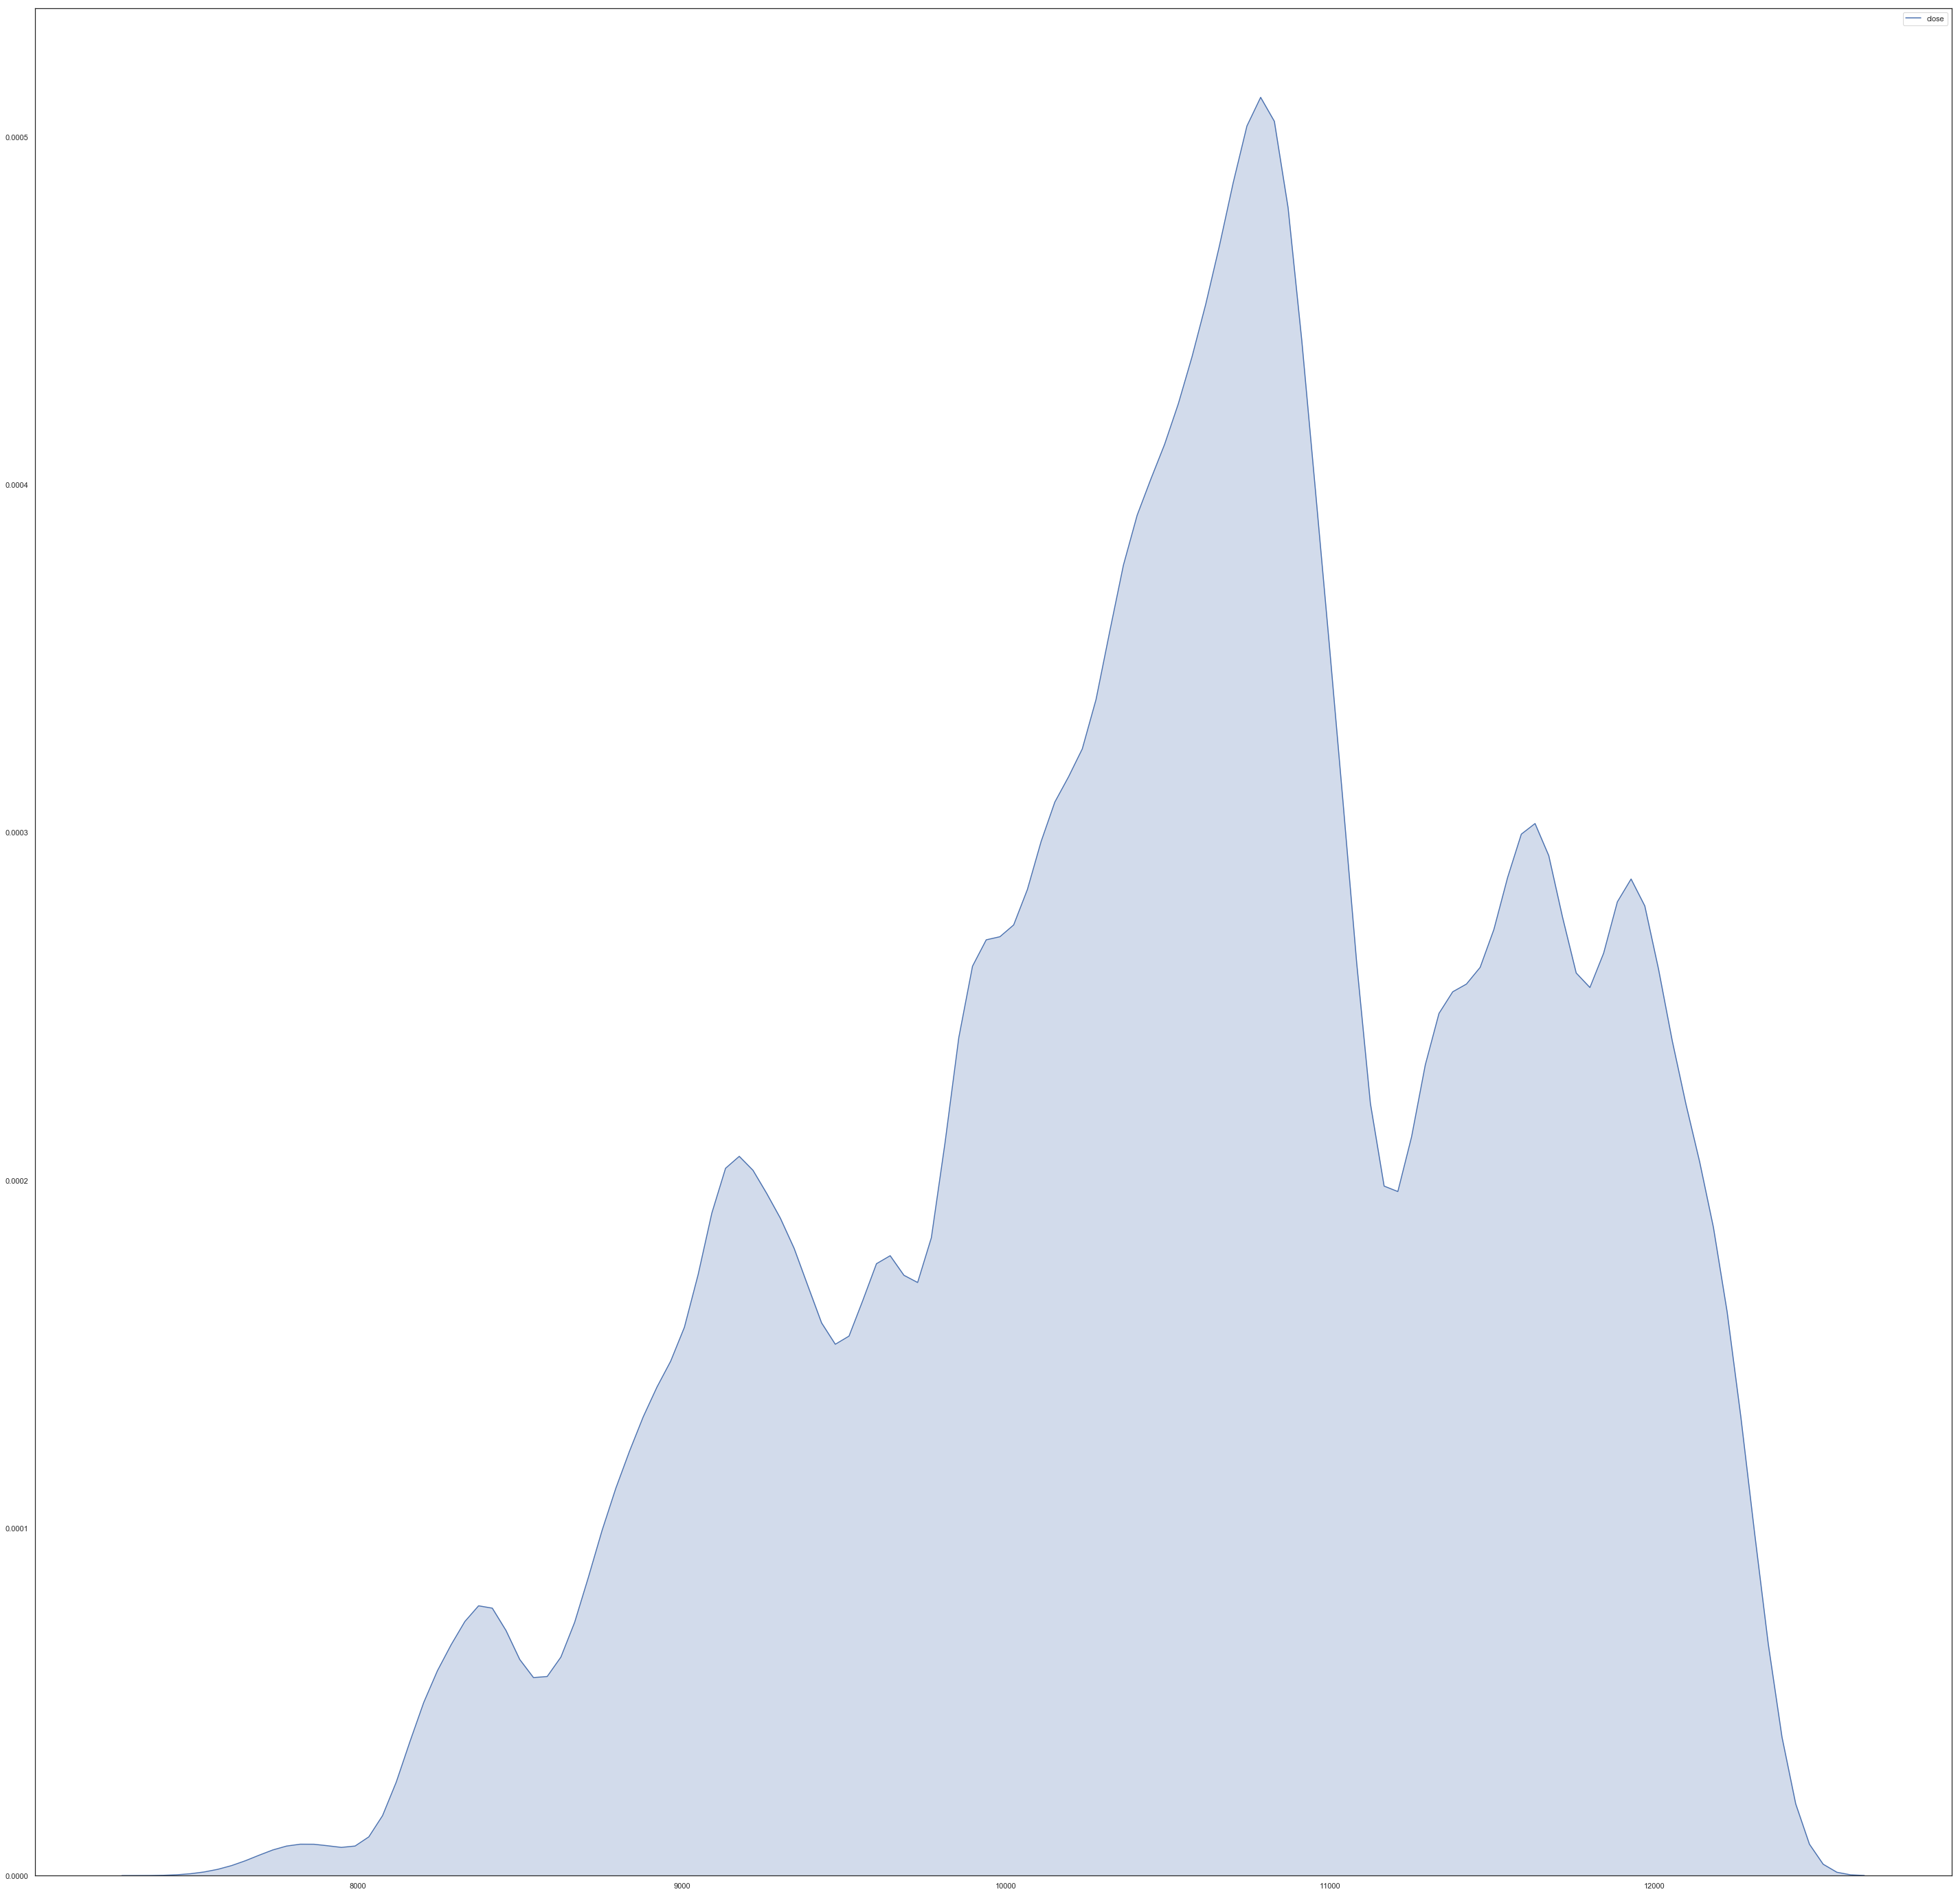

In [ ]:
# the closing prices of first 10 NIFTY_50__EQ__INDICES__NSE__MINUTE
# data is plotted in the following graph

nifty50.head()
sns.kdeplot(nifty50['close'],shade=True)


In [ ]:
df = pd.DataFrame({"nifty50": nifty50["close"].head(250000),
                        "nifty100": nifty100["close"].head(250000),
                        "nifty500": nifty500["close"].head(250000),
                    "niftyauto": niftyauto["close"].head(250000),
                    "niftybank": niftybank["close"].head(250000),
                    "niftycommod": niftycommod["close"].head(250000),
                    "niftybank": niftybank["close"].head(250000),
                           "niftyenergy": niftyenergy["close"].head(250000)
                          })

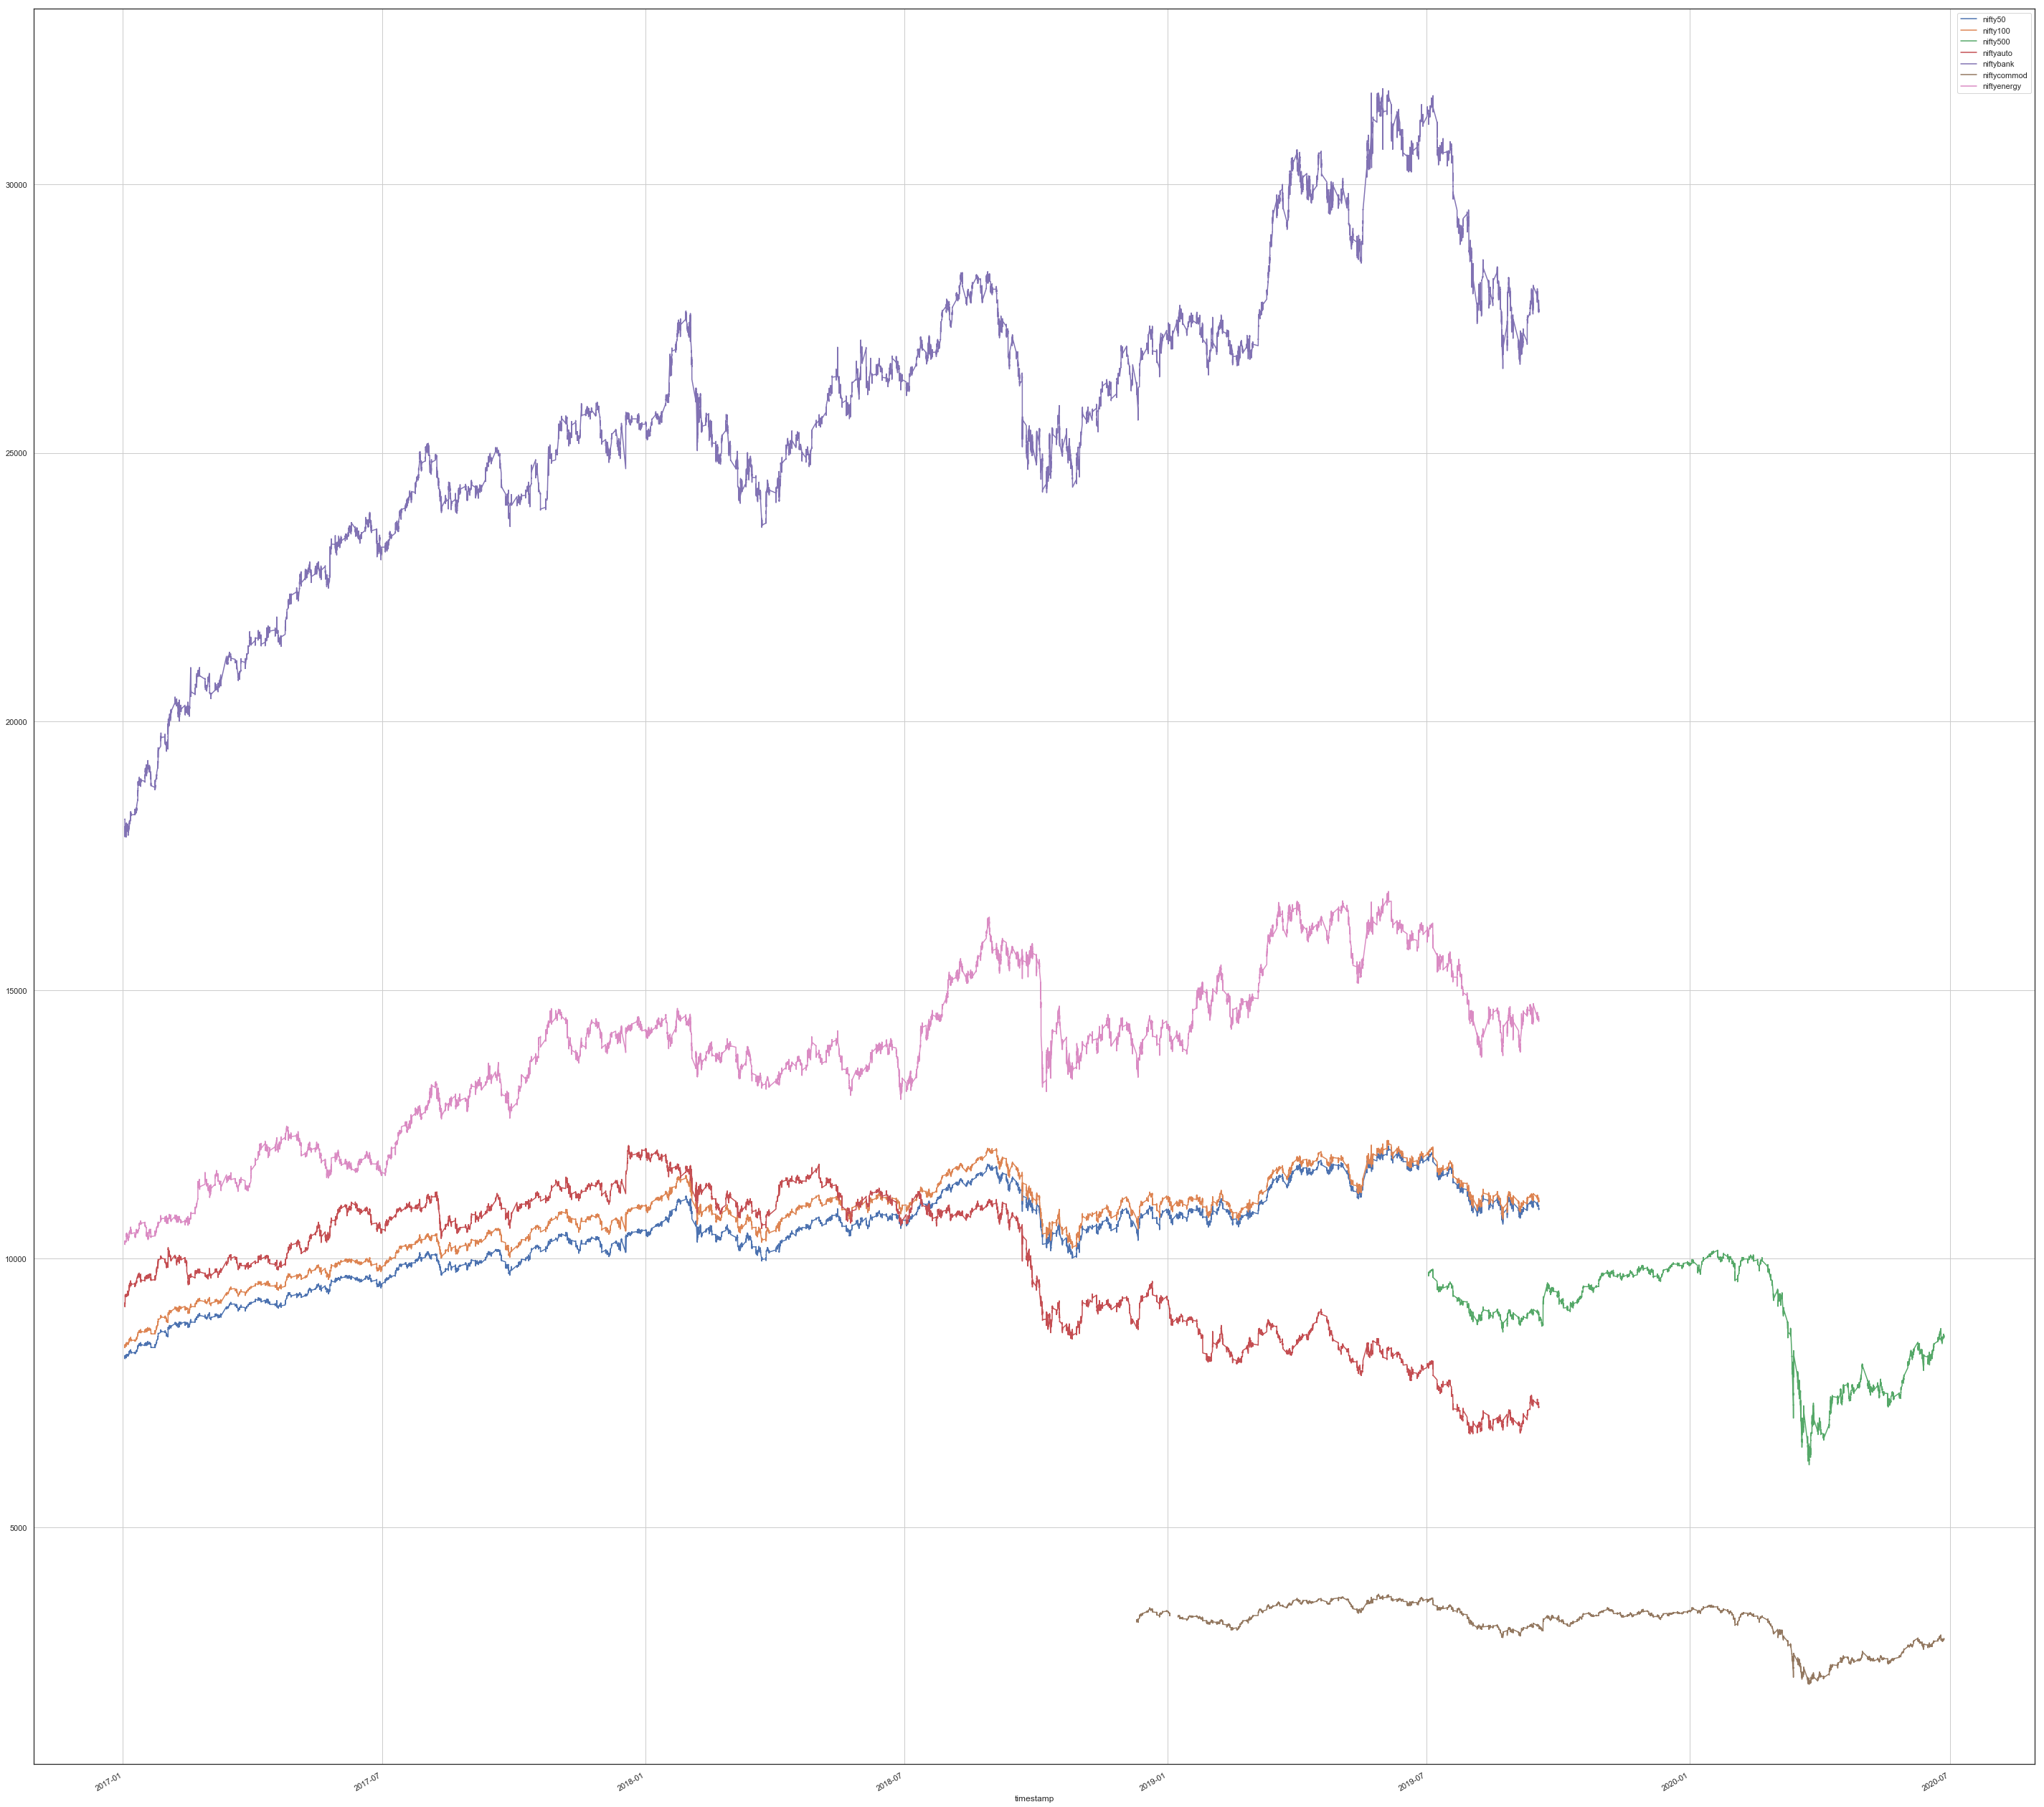

In [ ]:
# the closing prices of first 250000 data in the nifty50,
# nifty100,nifty500,niftyauto,niftybank,niftycommod,niftyenergy,
# niftyfin are plotted

df.plot(grid=True)

In [ ]:
# all null values of nifty50 data is removed 

nifty50.dropna(inplace=True)

In [ ]:
# all null values of niftybank data is removed 
niftybank.dropna(inplace=True)

In [ ]:
#Q-Q plot of VWAP
#used to determine whether dataset is distributed a certain way

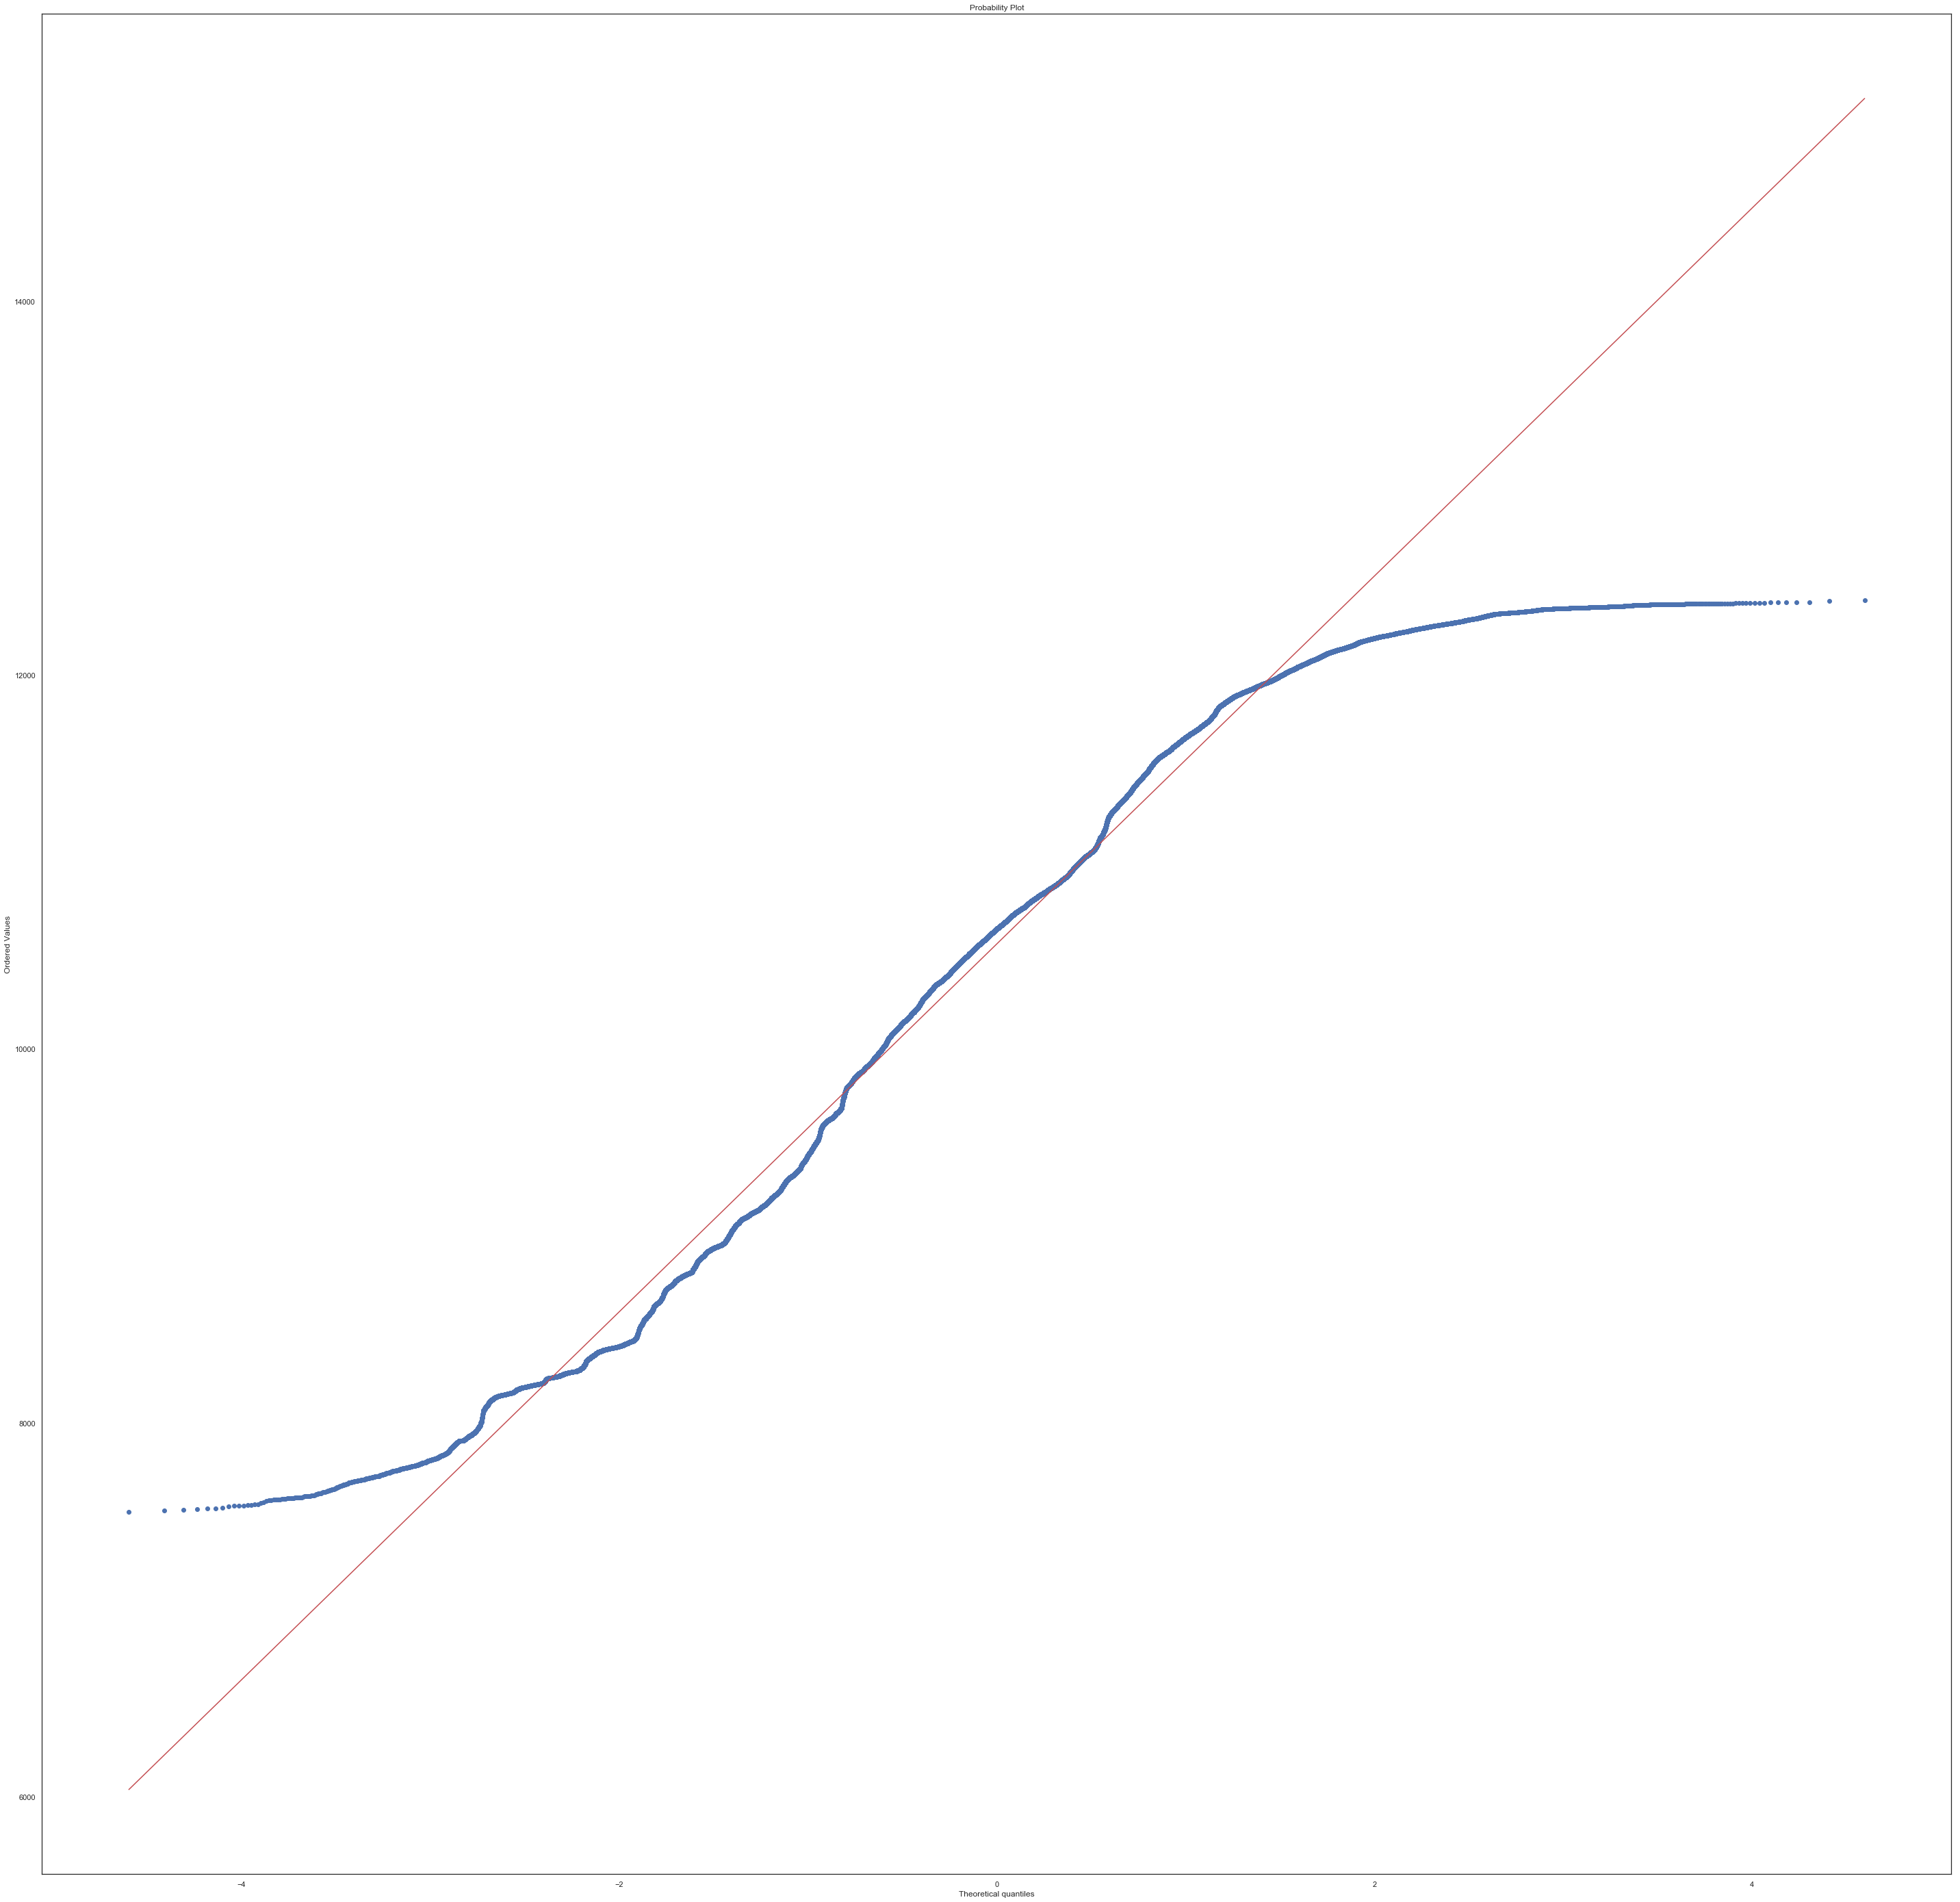

In [ ]:
# the Q-Q plot is plotted for the nifty50 datas clsoing price and is observed 
# that the data does npt follow a normal distribution and the data is heavy tailed.

scipy.stats.probplot(nifty50.close,plot=pylab)
pylab.show()

In [ ]:
# a dickey fuller test is run on the opening and closing values 
# of the nifty50 data and is observed that the data is not stationary

In [ ]:
def dicky_fuller_test(x):
    result = adfuller(x)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1]>0.05:
        print("Fail to reject the null hypothesis (H0), the data is non-stationary")
    else:
        print("Reject the null hypothesis (H0), the data is stationary.")

In [ ]:
dicky_fuller_test(nifty50['close'].head(10000))

ADF Statistic: -0.406209
p-value: 0.909057
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


In [ ]:
dicky_fuller_test(nifty50['open'].head(10000))

ADF Statistic: -0.552076
p-value: 0.881447
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


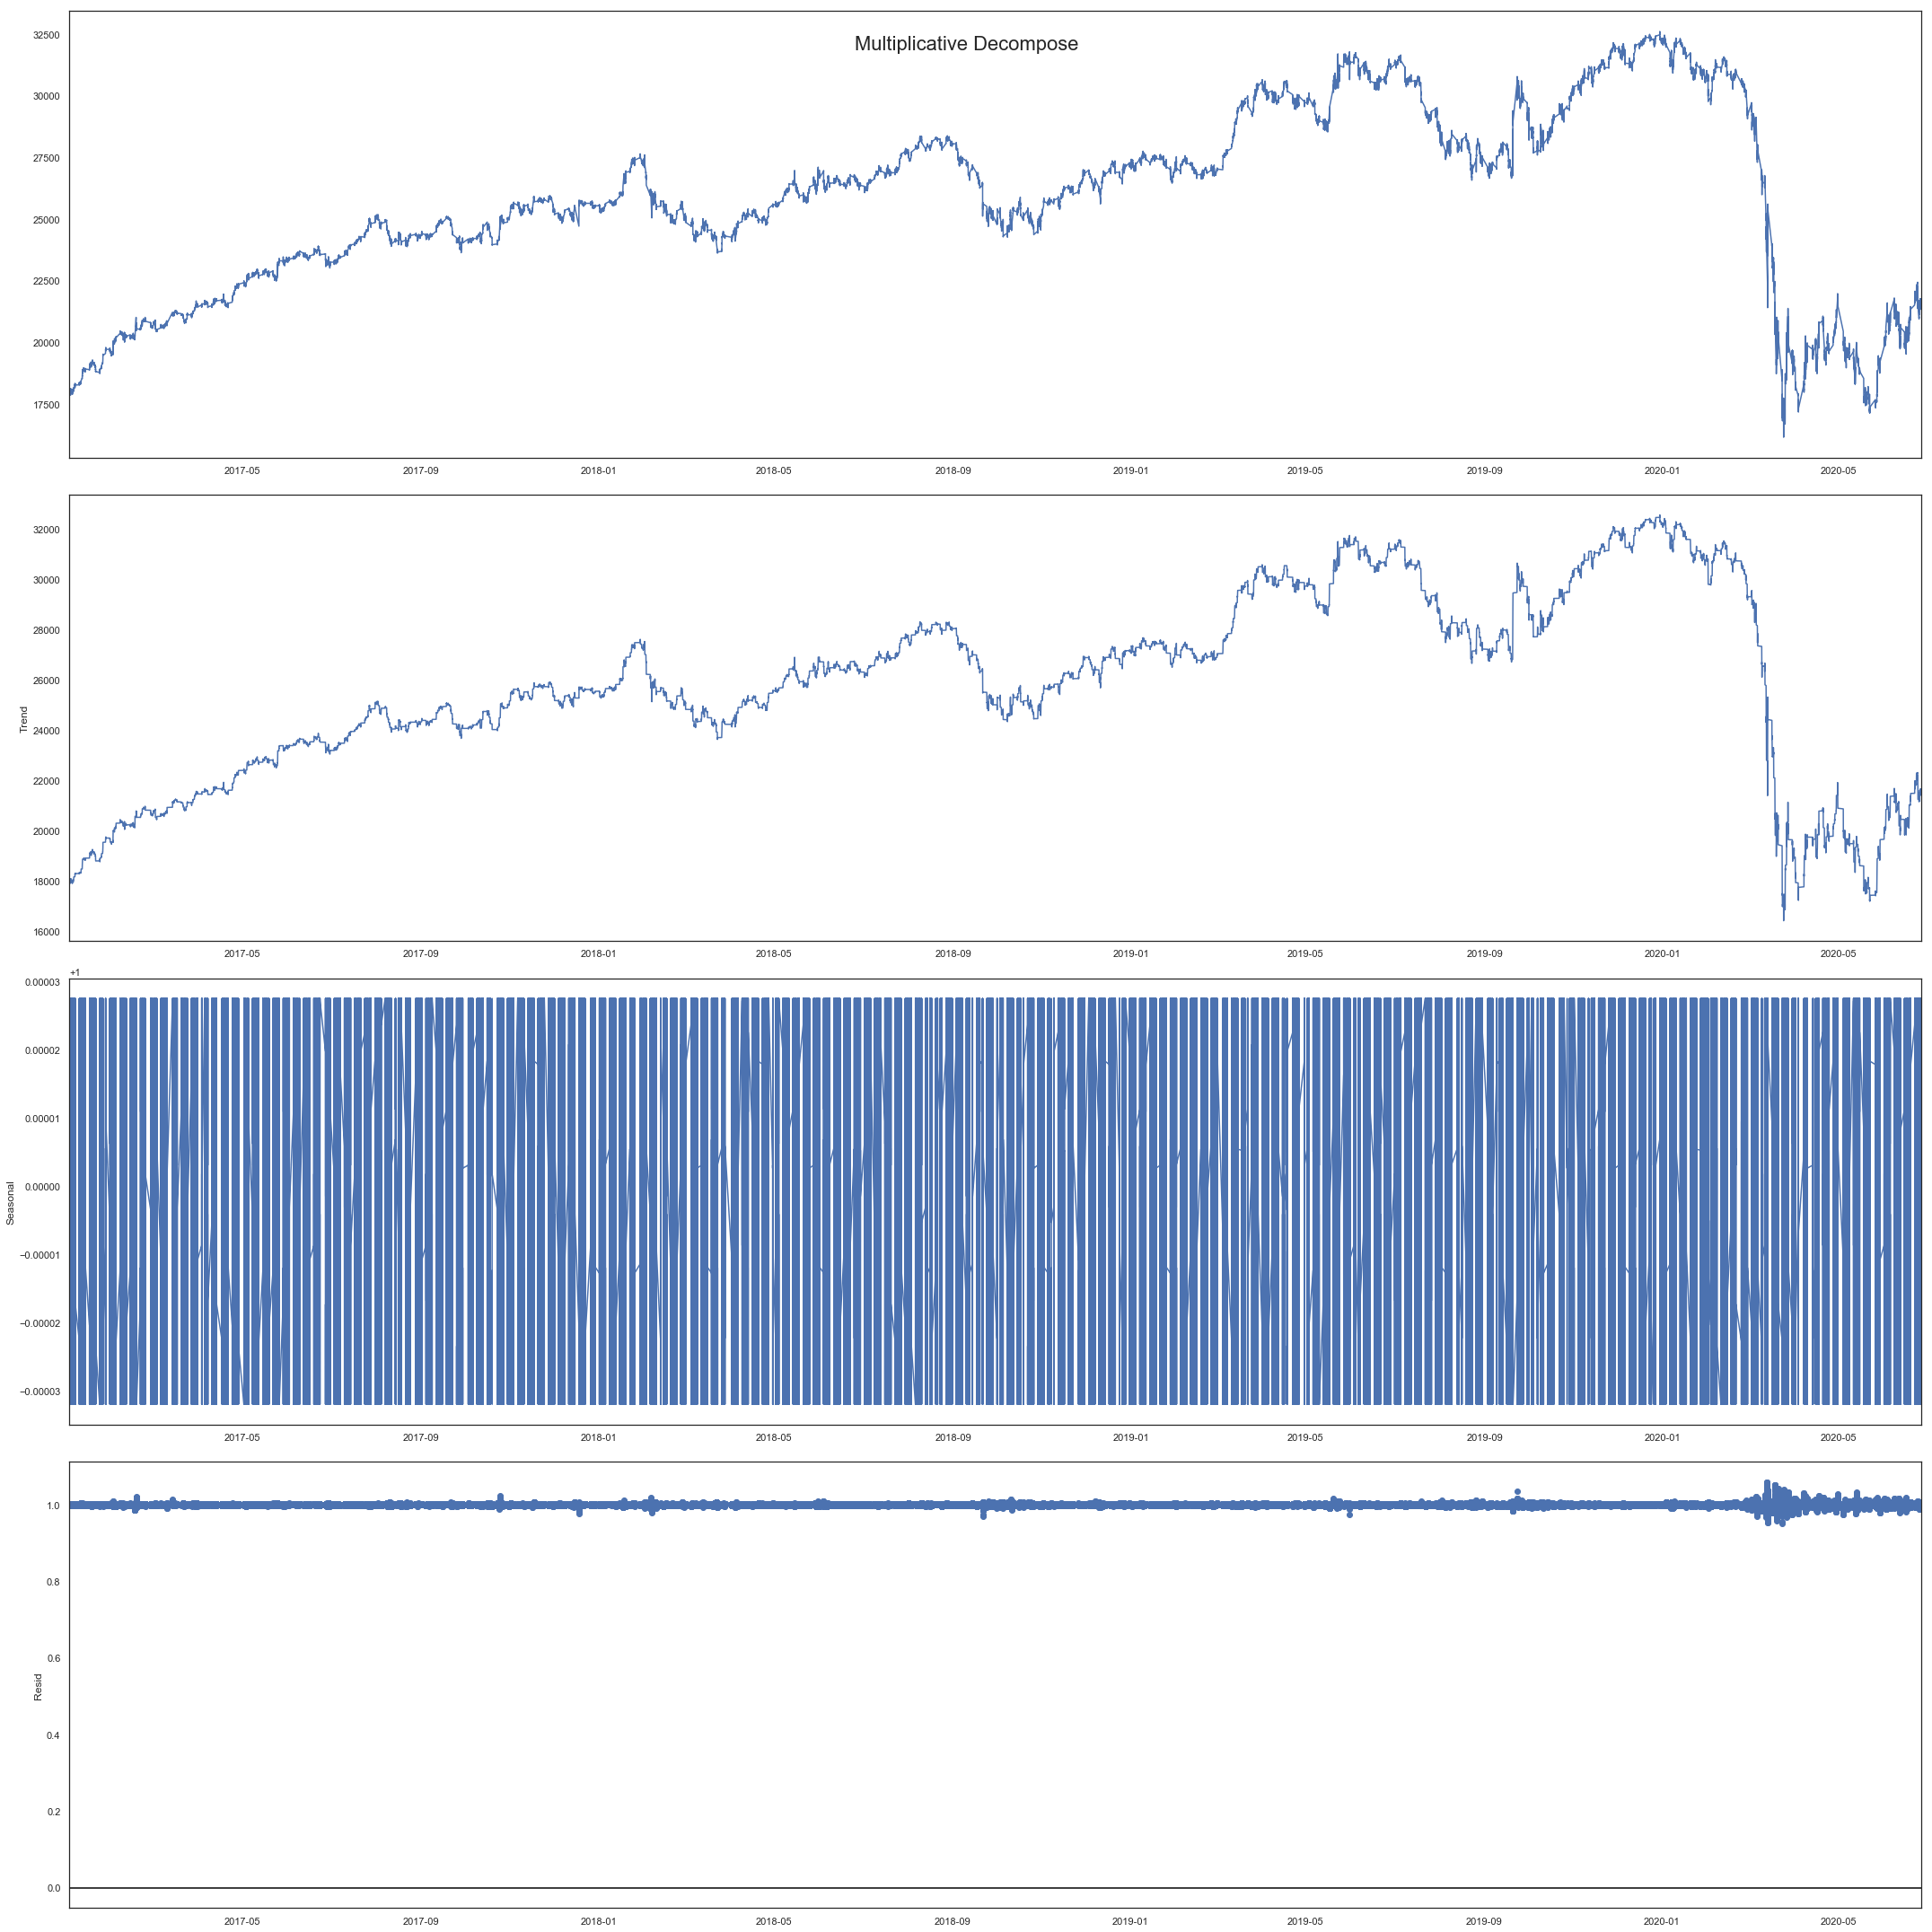

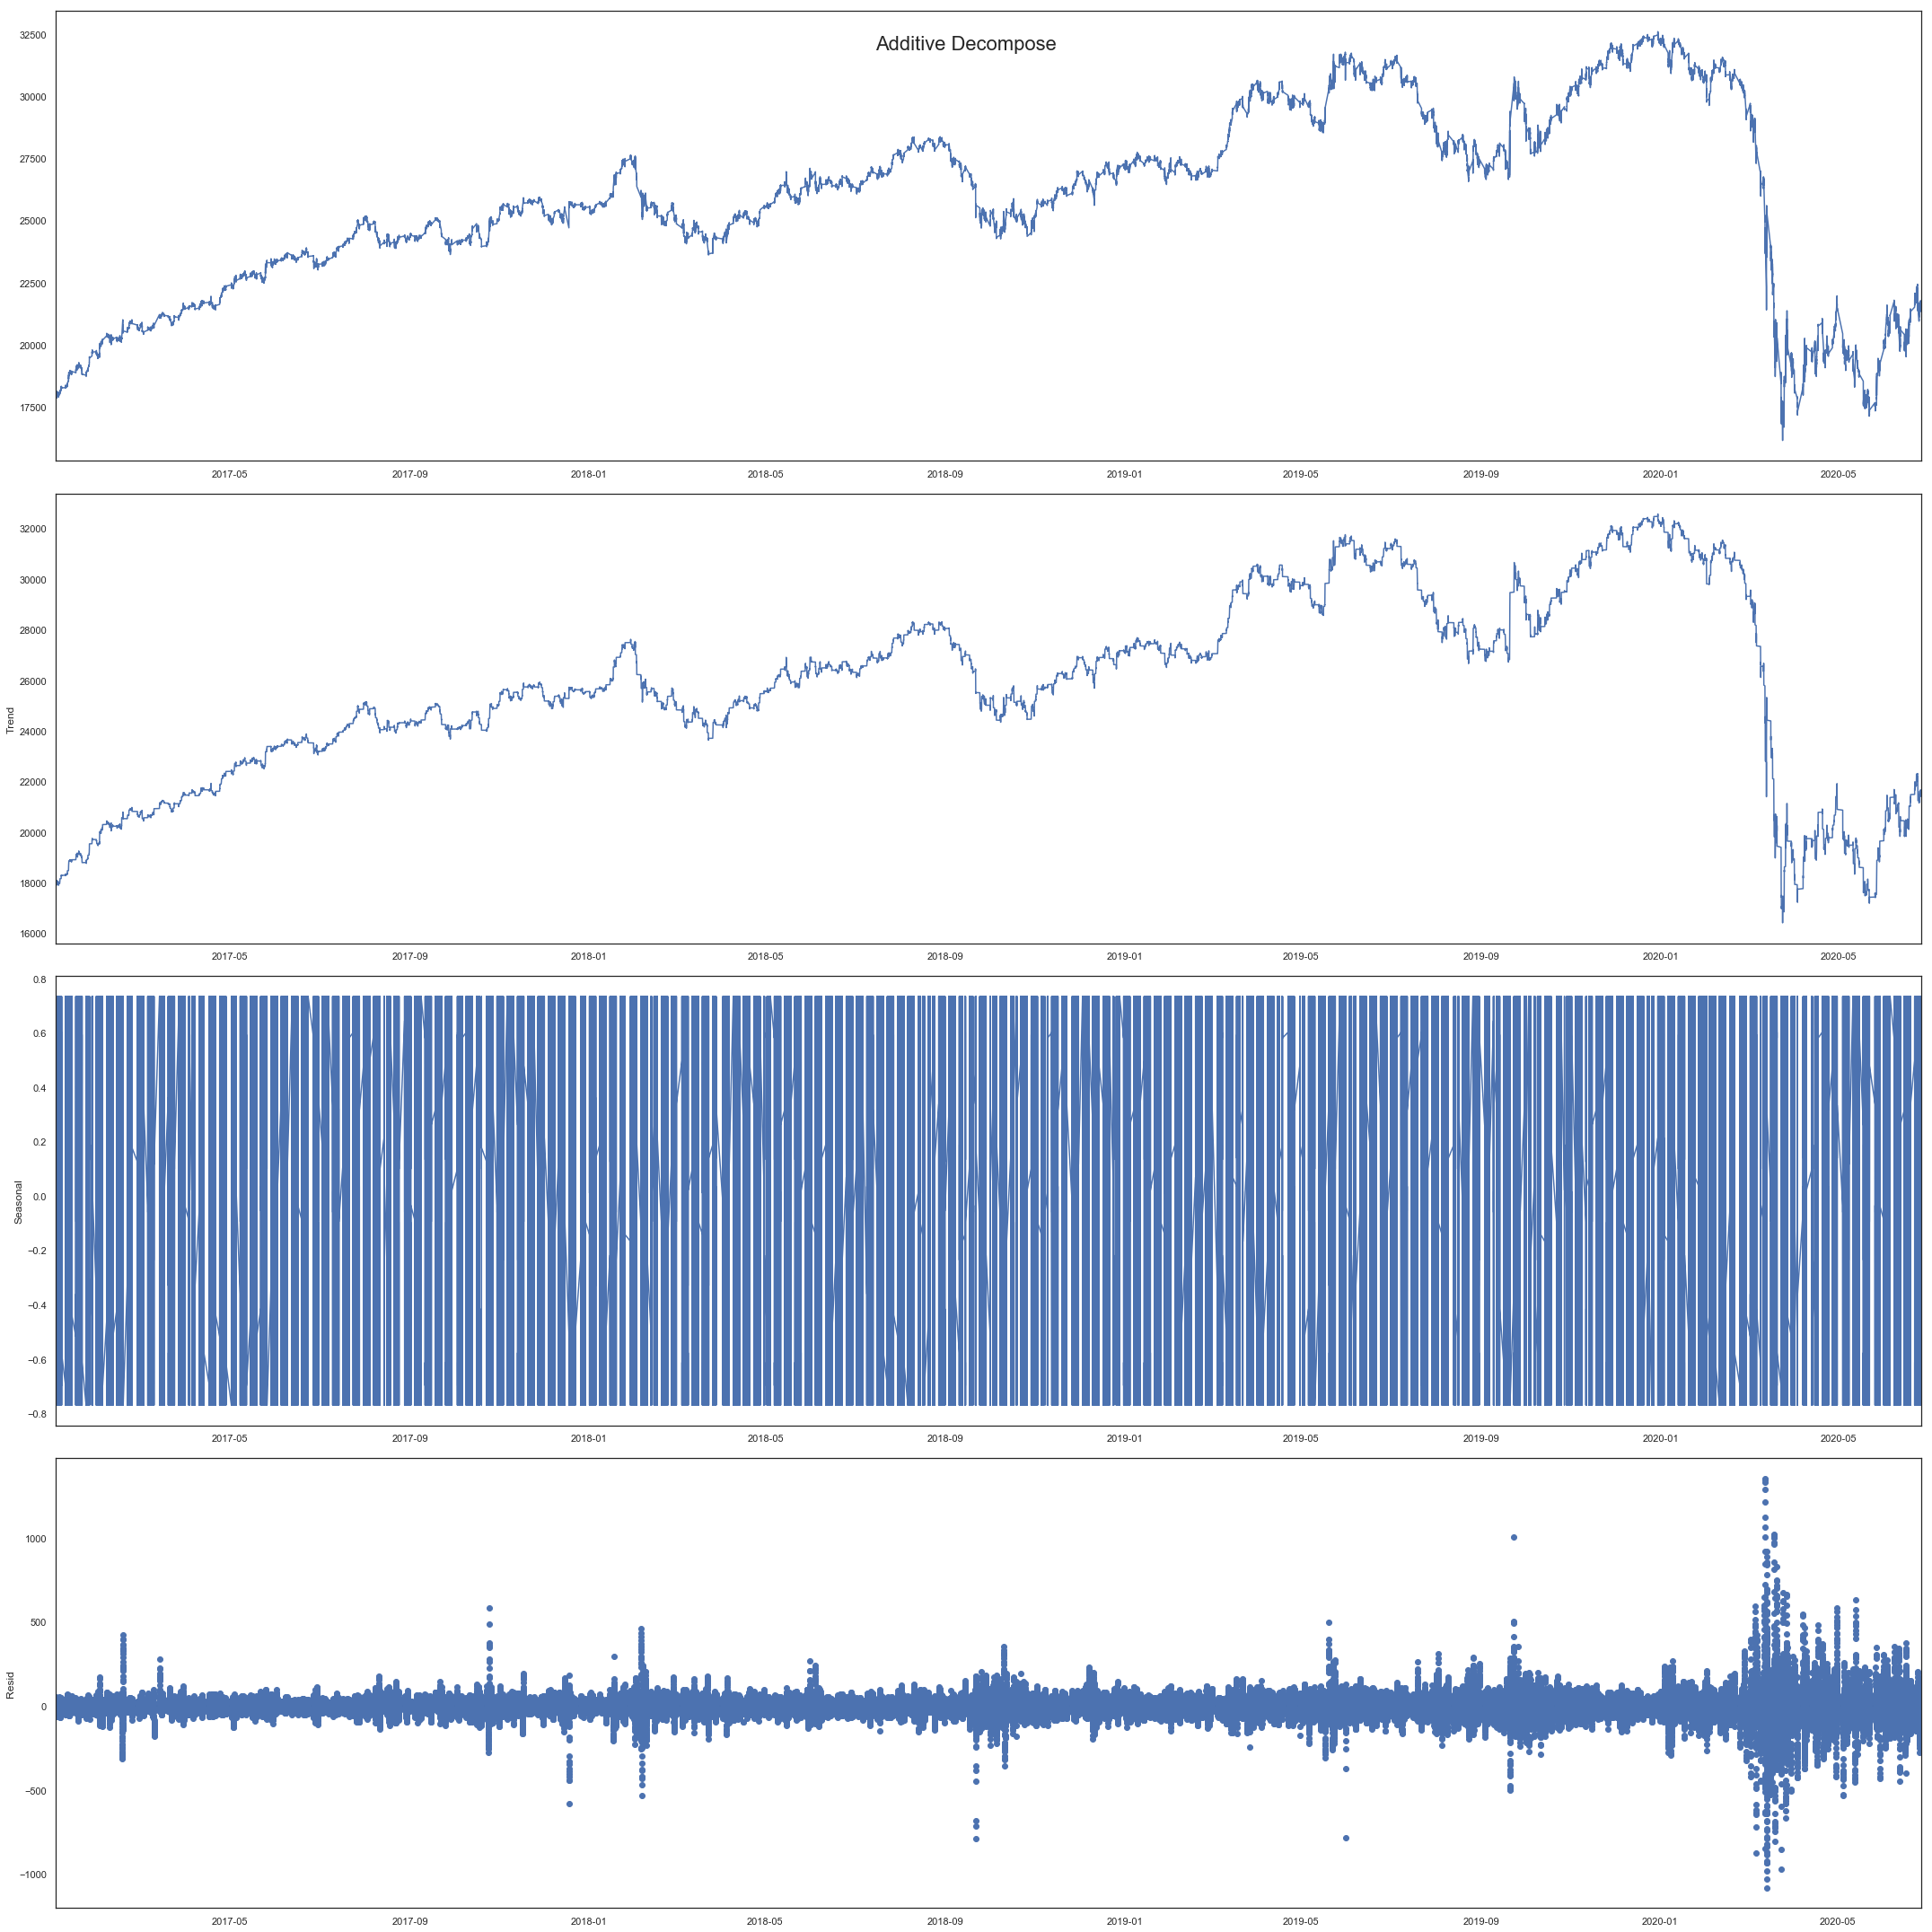

In [ ]:
# an additive and multiplicative decomposition analysis is done for the niftybank data

plt.rcParams.update({'figure.figsize': (10,10)})
y = niftybank['close'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (30,30)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


In [ ]:
#cyclic patter is shown in every 30 days (monthly)

In [ ]:

rel=pd.read_csv('./Reliance.csv')

rel.head()

#nifty50change = np.log(nifty50).diff()


Date    Symbol Series  Prev Close    Open    High     Low    Last  \
0  2000-01-03  RELIANCE     EQ      233.05  237.50  251.70  237.50  251.70   
1  2000-01-04  RELIANCE     EQ      251.70  258.40  271.85  251.30  271.85   
2  2000-01-05  RELIANCE     EQ      271.85  256.65  287.90  256.65  286.75   
3  2000-01-06  RELIANCE     EQ      282.50  289.00  300.70  289.00  293.50   
4  2000-01-07  RELIANCE     EQ      294.35  295.00  317.90  293.00  314.50   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  251.70  249.37   4456424  1.111319e+14     NaN                 NaN   
1  271.85  263.52   9487878  2.500222e+14     NaN                 NaN   
2  282.50  274.79  26833684  7.373697e+14     NaN                 NaN   
3  294.35  295.45  15682286  4.633254e+14     NaN                 NaN   
4  314.55  308.91  19870977  6.138388e+14     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [ ]:
# removing missing columns

#rel.drop(['Trades','Deliverable Volume','%Deliverble'],axis=1,inplace=True)



In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode()
fig = go.Figure([go.Scatter(x=rel.index, y=rel['VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP over time',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

In [ ]:
rel['Date']=pd.to_datetime(rel['Date'])
rel.set_index(['Date'],inplace=True)
fig = go.Figure([go.Scatter(x=rel.loc['2020', 'VWAP'].index,y=rel.loc['2020', 'VWAP'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='VWAP in 2020',
    template="simple_white",
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="VWAP")
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=rel.index, y=rel['Volume'])])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='Volume over time'
)
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Volume")
fig.show()

In [ ]:
dicky_fuller_test(rel['VWAP'])

ADF Statistic: -1.610873
p-value: 0.477517
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Fail to reject the null hypothesis (H0), the data is non-stationary


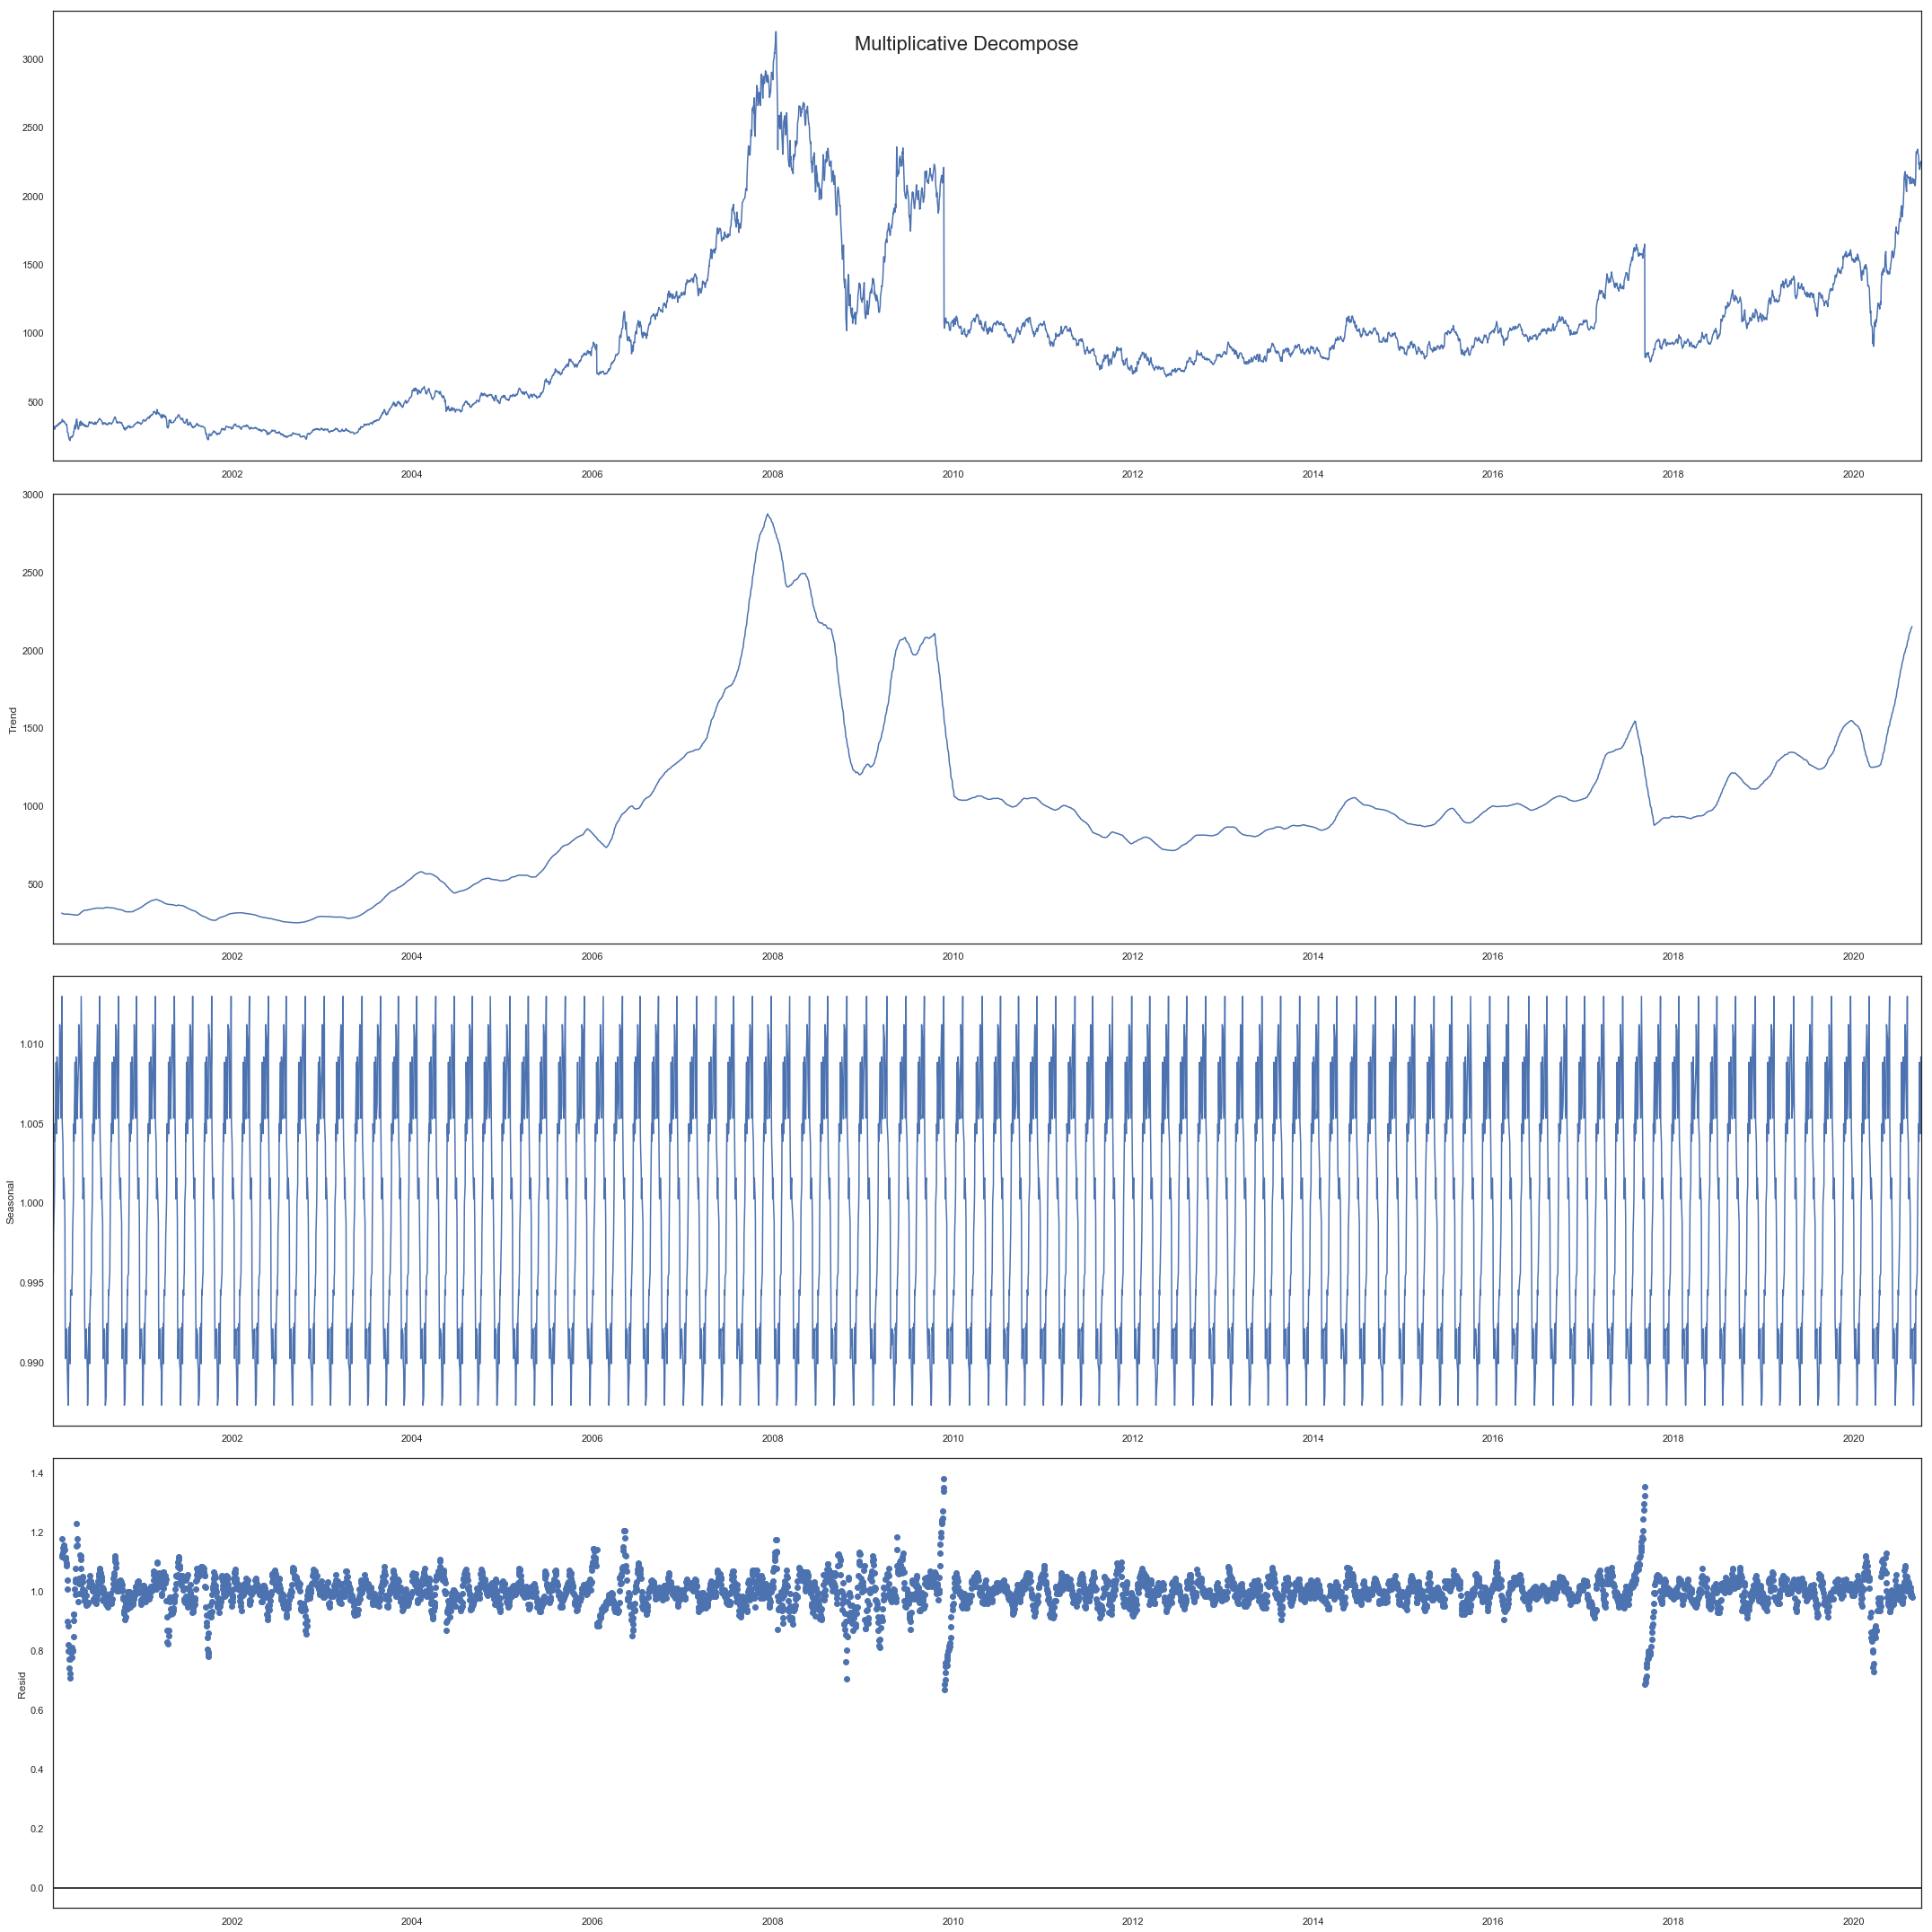

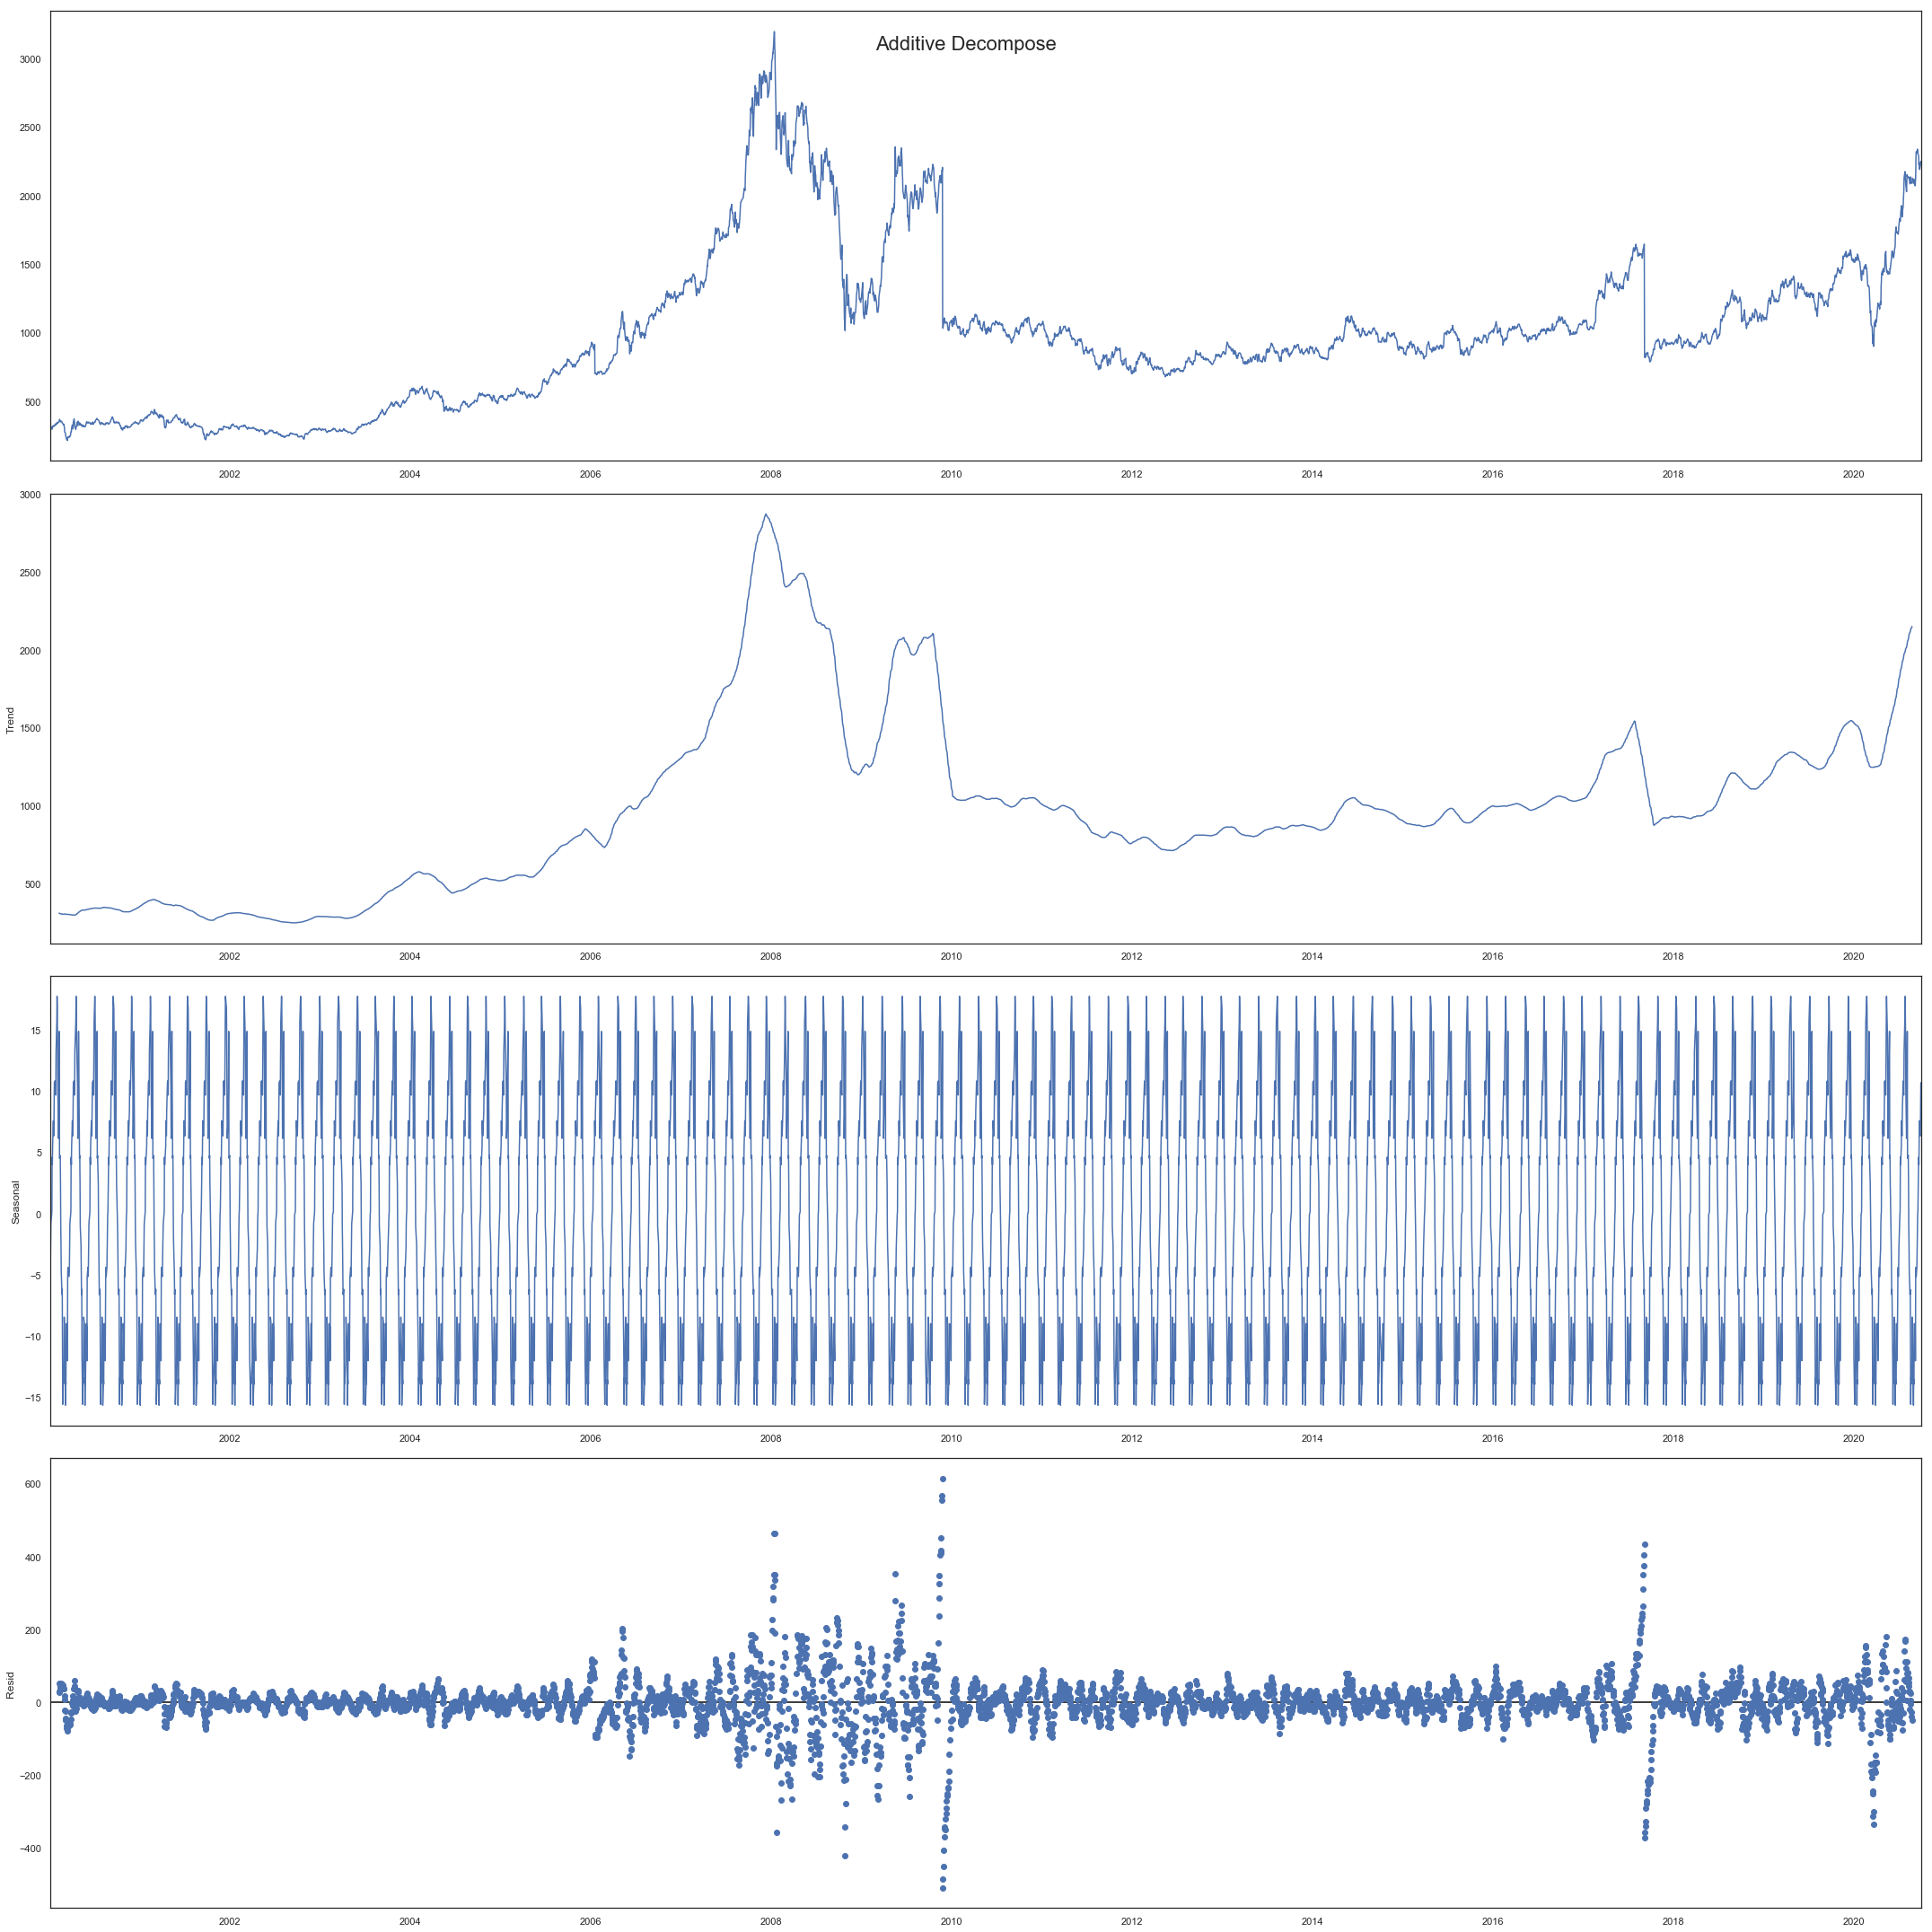

In [ ]:

from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10,10)})
y = rel['VWAP'].to_frame()


# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative',period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive',period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (30,30)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

cyclic patter is shown in every 30 days (monthly)

In [ ]:
rel['vwap_diff']=rel['VWAP']-rel['VWAP'].shift(1)

Convert Stationary into Non Stationary

In [ ]:
fig = go.Figure([go.Scatter(x=rel.index,y=rel.VWAP)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='VWAP over time ')
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=rel.index,y=rel.vwap_diff)])
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    template='simple_white',
    title='difference VWAP over time ')
fig.show()

Plotting ACF and PACF
Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.

Statistical correlation summarizes the strength of the relationship between two variables.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

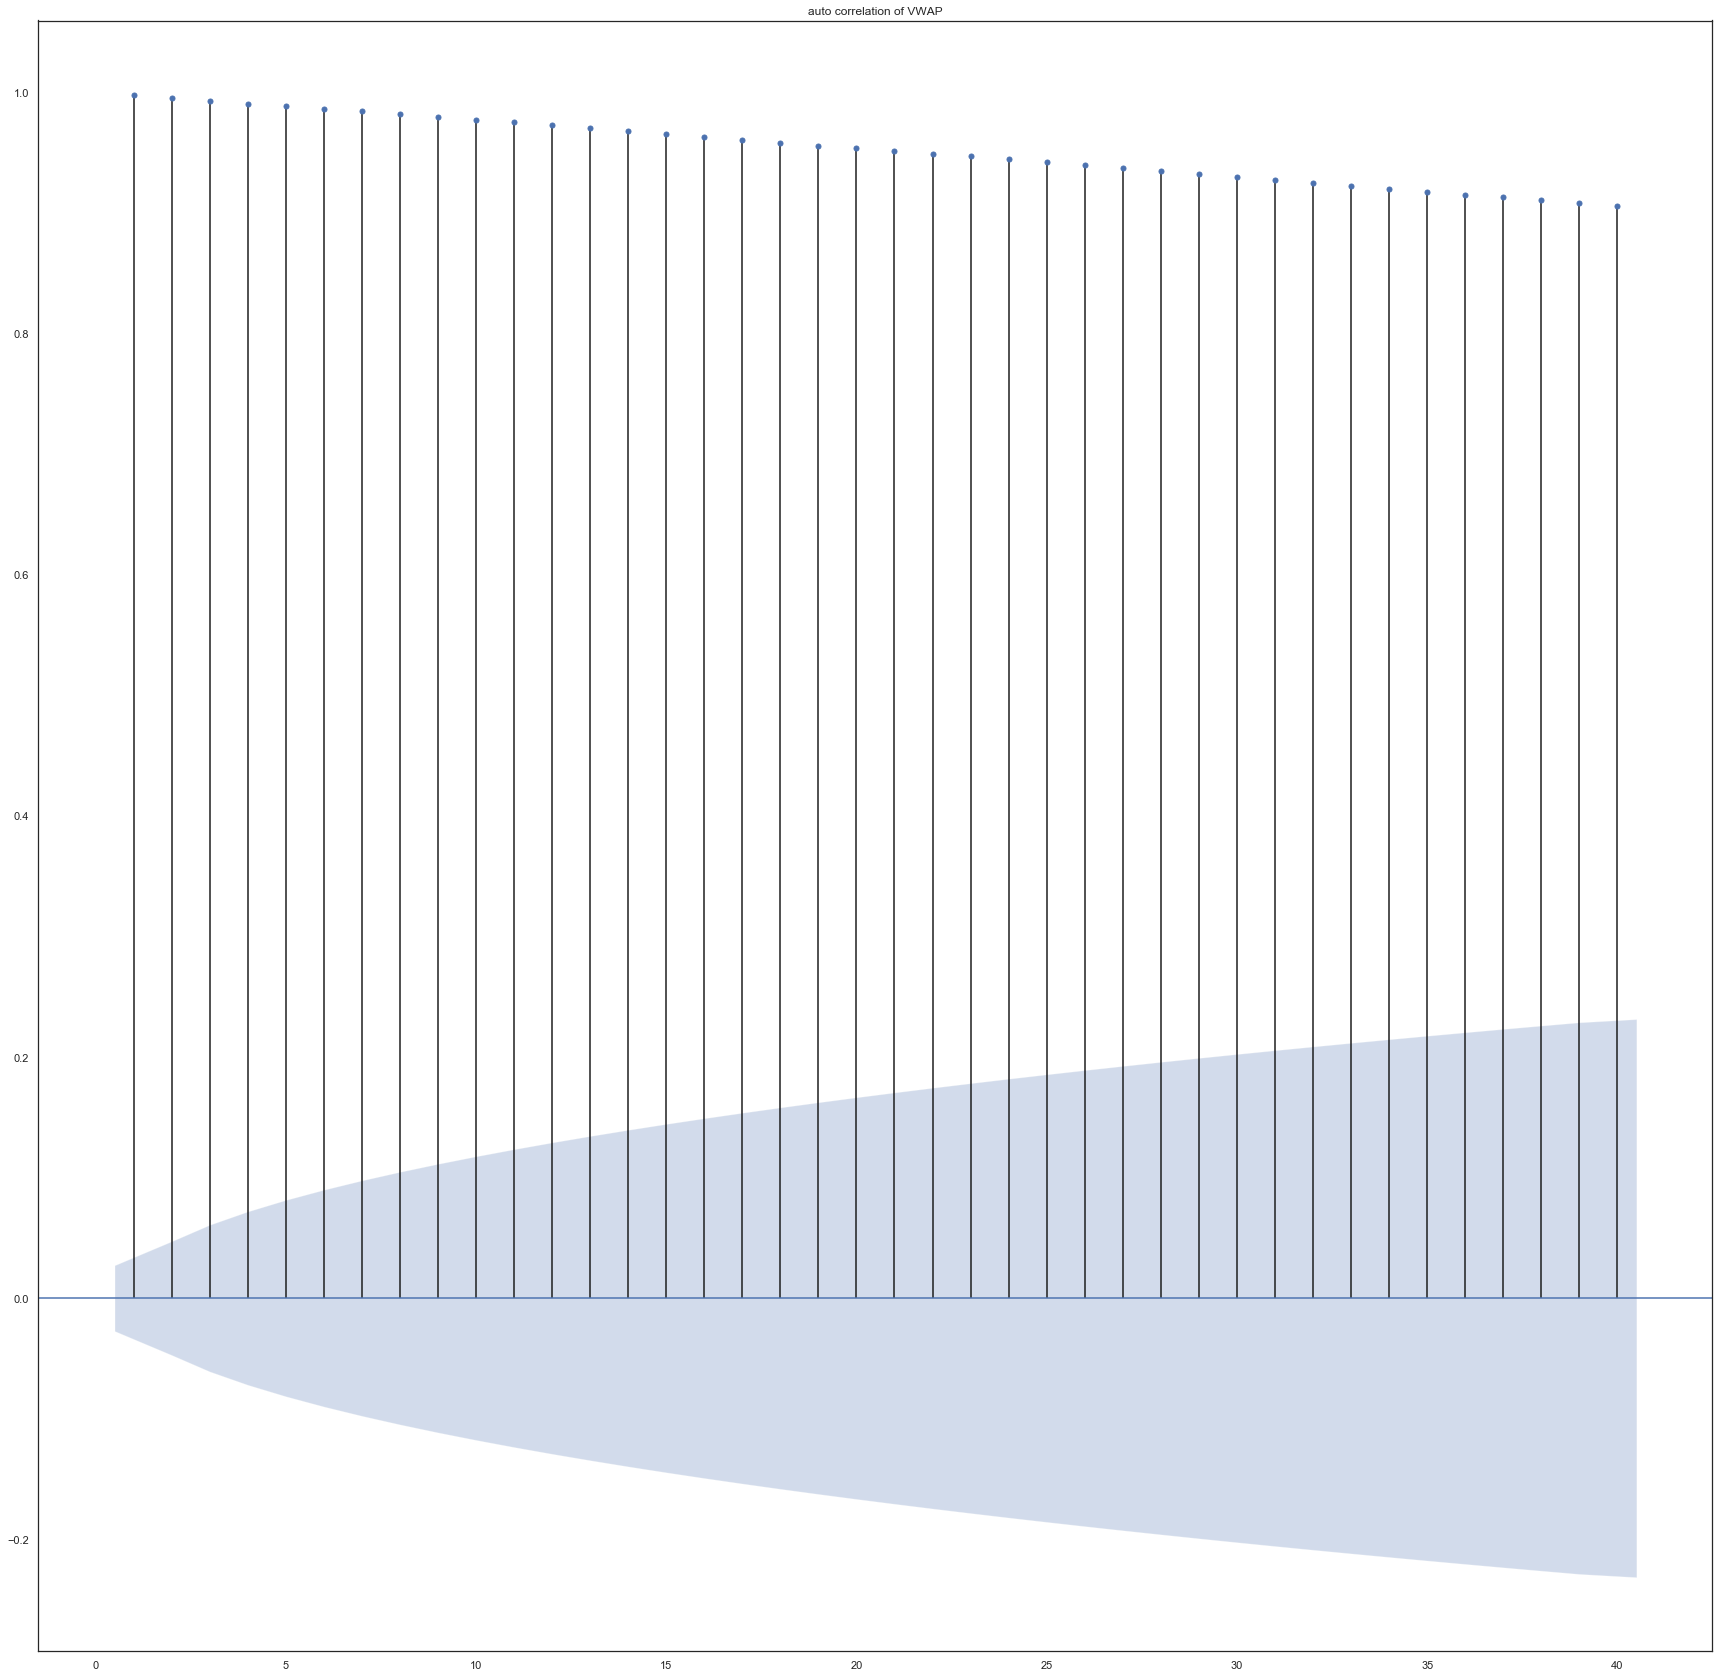

In [ ]:
sm.graphics.tsa.plot_acf(rel['VWAP'].iloc[1:], lags=40,title='auto correlation of VWAP',zero=False)
plt.show()

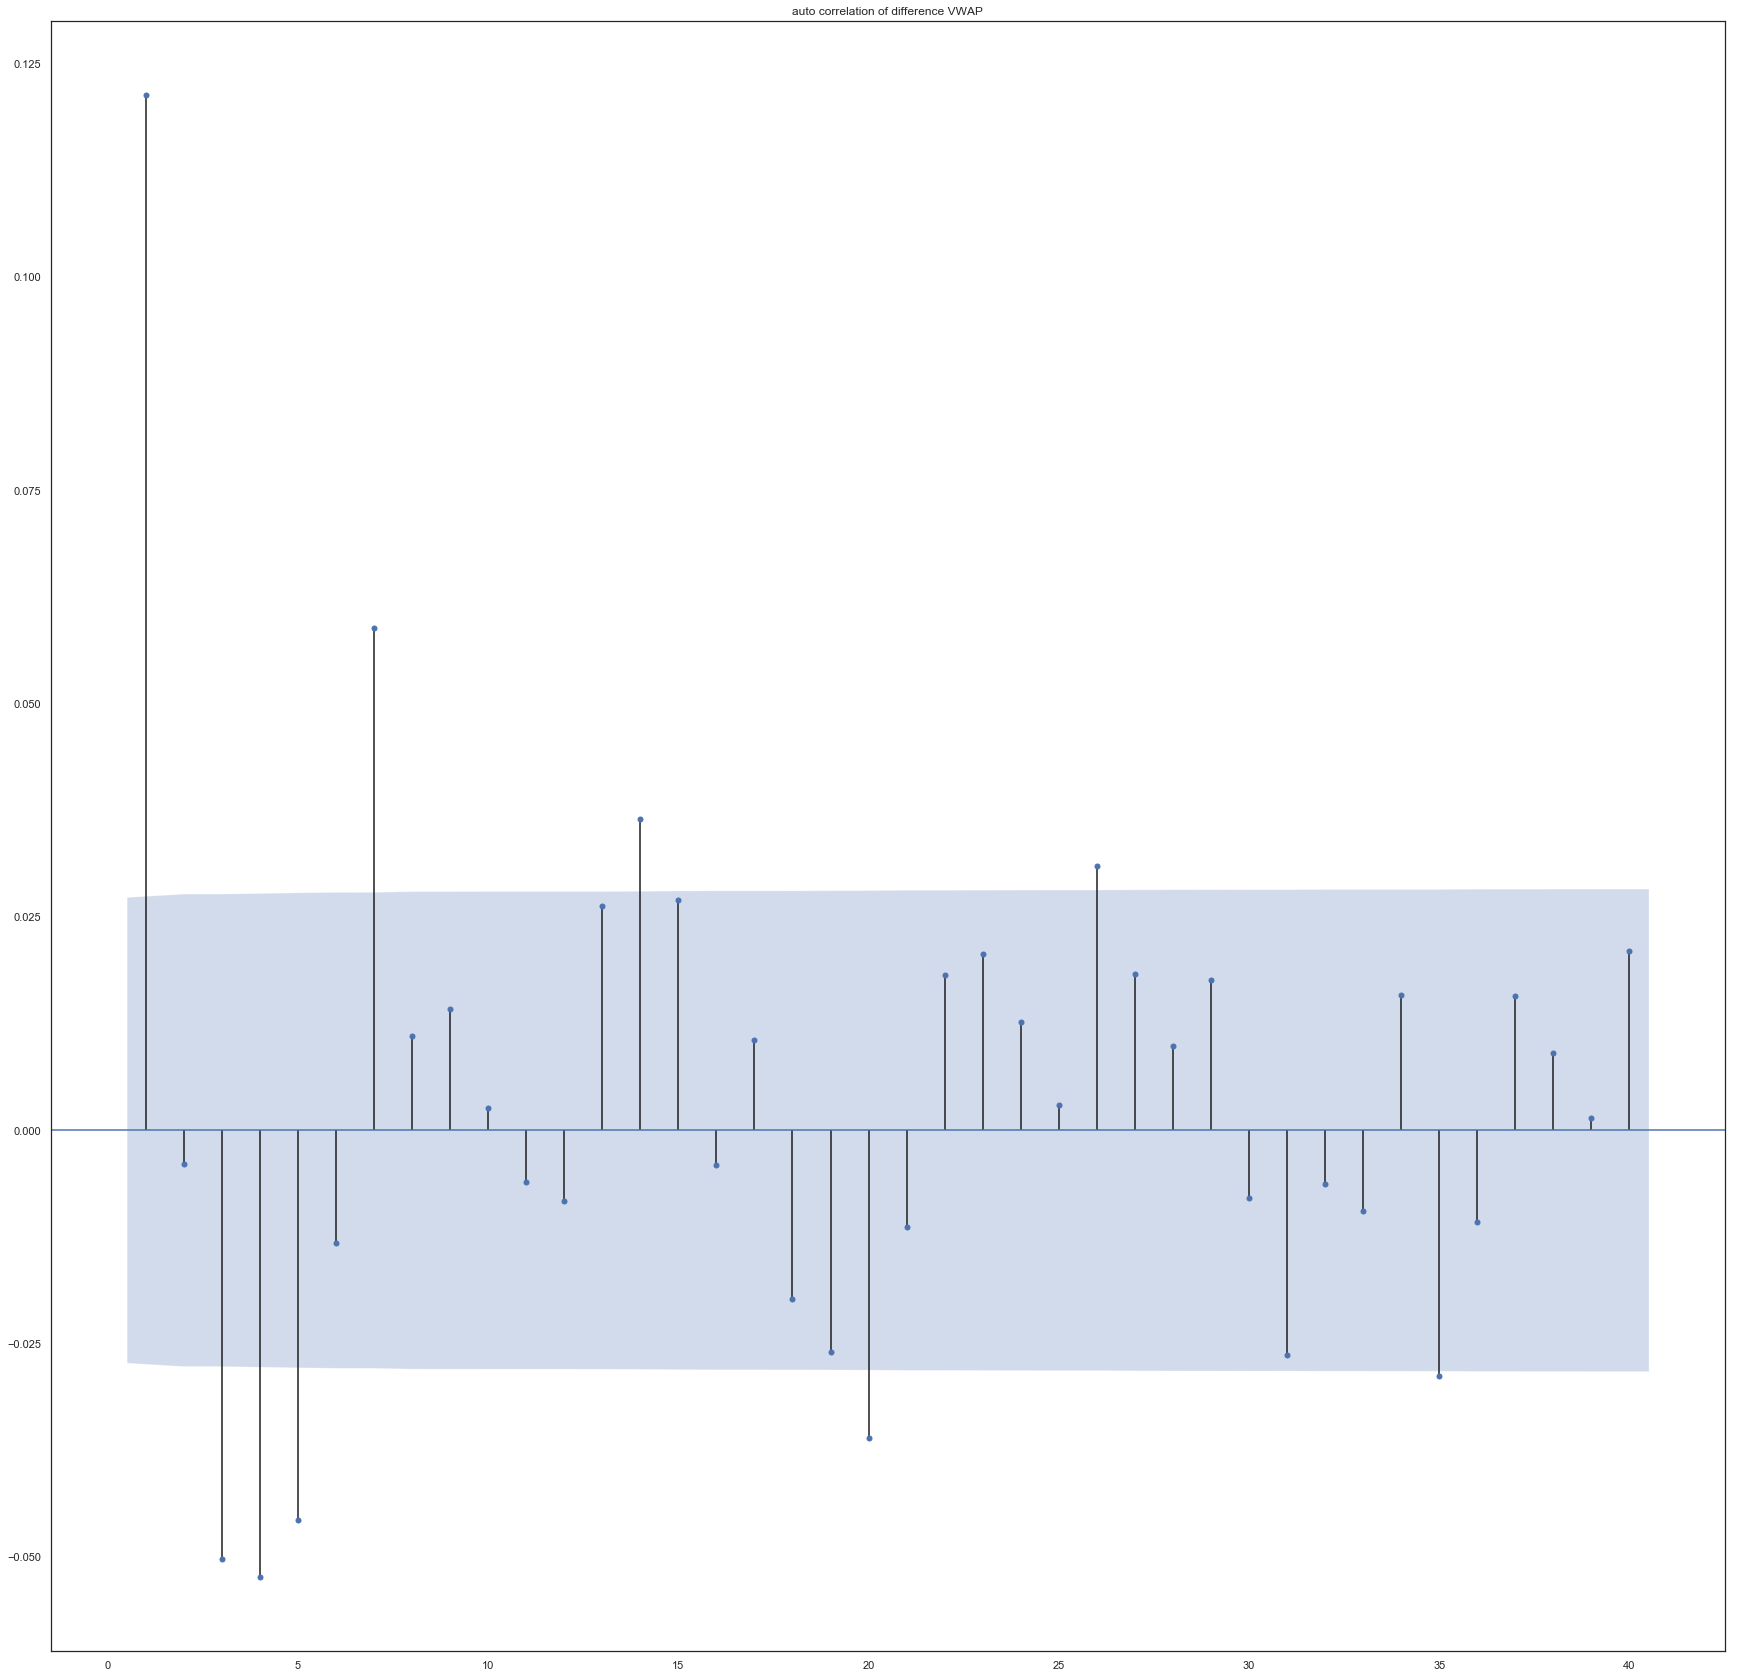

In [ ]:
sm.graphics.tsa.plot_acf(rel['vwap_diff'].iloc[7:], lags=40,title='auto correlation of difference VWAP',zero=False)
plt.show()

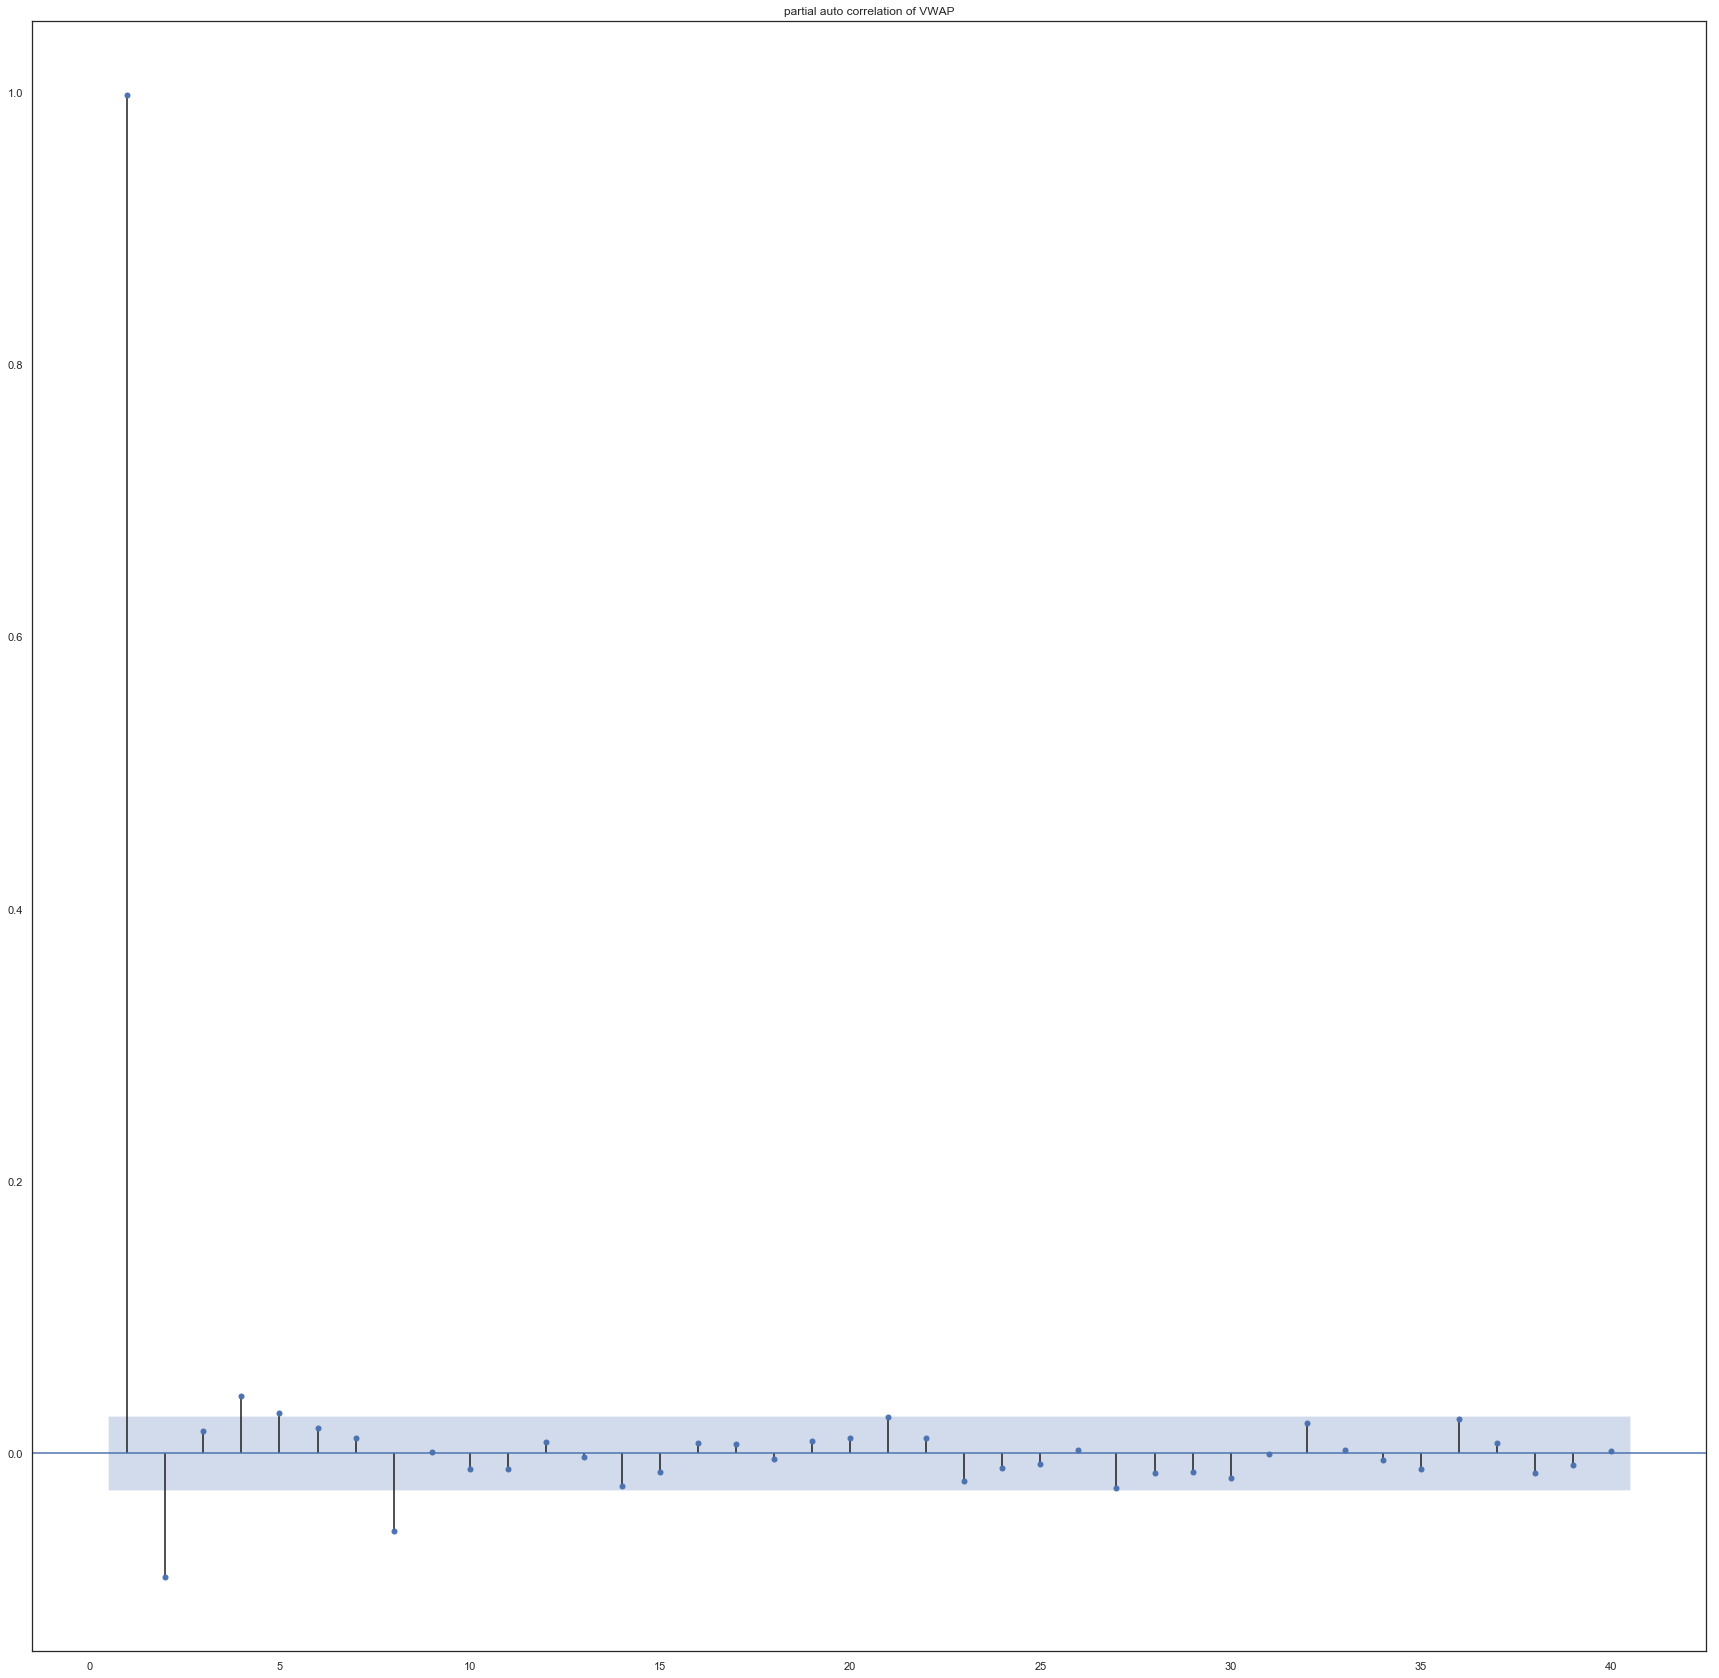

In [ ]:
sm.graphics.tsa.plot_pacf(rel['VWAP'].iloc[1:], lags=40,title='partial auto correlation of VWAP',zero=False)
plt.show()

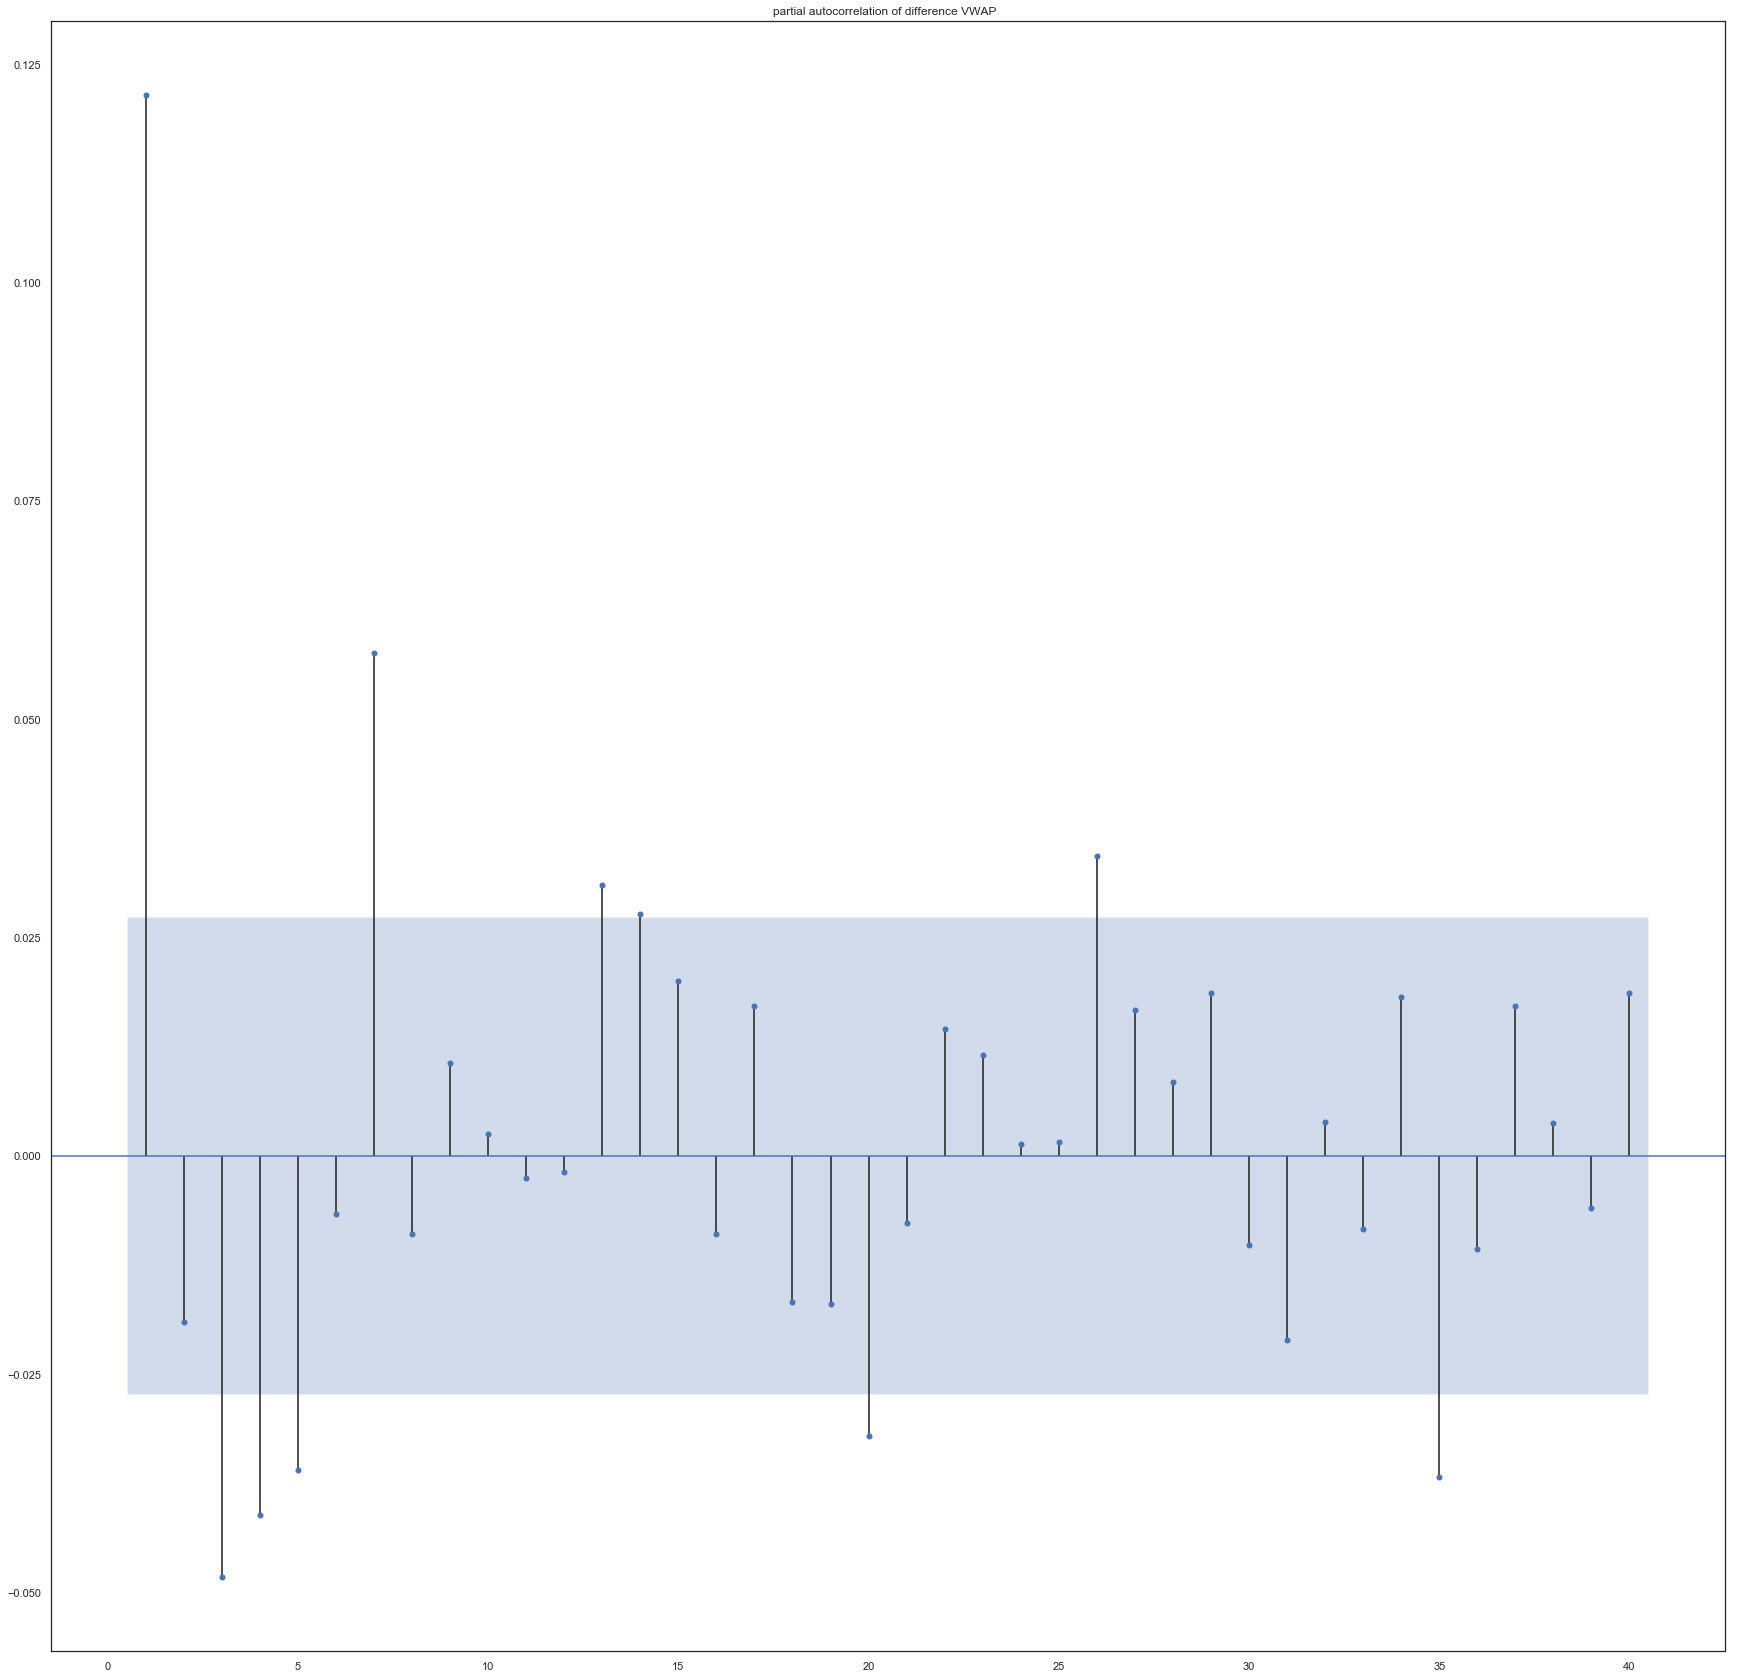

In [ ]:
sm.graphics.tsa.plot_pacf(rel['vwap_diff'].iloc[1:], lags=40,title='partial autocorrelation of difference VWAP  ',zero=False)
plt.show()

In [ ]:
# from collections import OrderedDict
# nifty50df = nifty50.resample('1d').agg(
#     OrderedDict([
#         ('open', 'first'),
#         ('high', 'max'),
#         ('low', 'min'),
#         ('close', 'last'),
#     ])
# )

# rolling = nifty50df['close'].rolling(365, center=True)

# data = pd.DataFrame({'input': nifty50df,
#                      'one-year rolling_mean': rolling.mean(),
#                      'one-year rolling_std': rolling.std()})
# ax = data.plot(style=['-', '--', ':'])
# ax.lines[0].set_alpha(0.3)

In [ ]:
#Resampling and converting frequencies
nifty50['close'].plot(alpha=0.5, style='-')
nifty50['close'].resample('M').mean().plot(style=':')
nifty50['close'].asfreq('M').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [ ]:
Notice the difference: at each point, resample reports the average of the previous year, 
while asfreq reports the value at the end of the year

In [ ]:
from collections import OrderedDict
df = nifty50.resample('1d').agg(
    OrderedDict([
        ('open', 'first'),
        ('high', 'max'),
        ('low', 'min'),
        ('close', 'last'),
        ('volume', 'sum'),
    ])
)
pct_change = np.log(df).diff()

In [ ]:
pct_change